In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('Train_IDs.csv')
test = pd.read_csv('Test_IDs.csv')

# Load raw data and then preprocess


## demographics.csv

In [ ]:
demo = pd.read_csv('demographics.csv')

In [ ]:
demo

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,1746-TGTWV,1.0,Male,78.0,No,Yes,No,No,0.0
1,8499-BRXTD,1.0,Female,74.0,No,Yes,Yes,NaN,1.0
2,2041-JIJCI,1.0,Male,71.0,No,Yes,No,Yes,3.0
3,5832-EXGTT,1.0,Female,78.0,No,Yes,Yes,Yes,1.0
4,8350-NYMVI,NaN,NaN,80.0,No,Yes,NaN,Yes,1.0
...,...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,NaN,Female,NaN,No,No,No,No,0.0
6159,4835-YSJMR,1.0,Male,38.0,No,No,NaN,Yes,2.0
6160,5067-DGXLL,1.0,NaN,30.0,No,No,Yes,Yes,2.0
6161,3129-AAQOU,1.0,Female,32.0,No,No,Yes,Yes,2.0


In [ ]:
demo = demo.drop('Count', axis=1)

In [ ]:
# ['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents']
to_binary = list(demo.columns)
to_binary = to_binary[1:2]+to_binary[3:-1]

In [ ]:
to_binary

['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents']

In [ ]:
sub = ['IsMale', 'IsUnder30', 'IsSenior', 'IsMarried', 'HasDependents']

In [ ]:
df_tmp = demo[:]

for i,col_name in enumerate(to_binary):
  tmp = pd.DataFrame(columns=[sub[i]])
  dummies = pd.get_dummies( demo[col_name], dummy_na=True )
  eliminate = list(dummies.columns)[0]
  dummies = dummies.drop([eliminate], axis=1)
  for j, row in dummies.iterrows():
    # print(row.values)
    # print(row)
    if row.values[1]==1:
      tmp.loc[j, sub[i]] = np.nan
    else:
      tmp.loc[j, sub[i]] = row.values[0]
  
  df_tmp = pd.concat( (df_tmp, tmp) , axis=1 ).drop([col_name], axis=1)
  # print( eliminate, dummies )
  # dummies = dummies.drop([eliminate], axis=1)
  # dummies.columns = [sub[i]]
  # df_tmp = pd.concat( (df_tmp, dummies) , axis=1 ).drop([col_name], axis=1)

In [ ]:
df_tmp

,Customer ID,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents
0,1746-TGTWV,78.0,0.0,1,0,1,0,0
1,8499-BRXTD,74.0,1.0,0,0,1,1,NaN
2,2041-JIJCI,71.0,3.0,1,0,1,0,1
3,5832-EXGTT,78.0,1.0,0,0,1,1,1
4,8350-NYMVI,80.0,1.0,NaN,0,1,NaN,1
...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,NaN,0.0,0,0,0,0,0
6159,4835-YSJMR,38.0,2.0,1,0,0,NaN,1
6160,5067-DGXLL,30.0,2.0,NaN,0,0,1,1
6161,3129-AAQOU,32.0,2.0,0,0,0,1,1


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           6163 non-null   object 
 1   Age                   5393 non-null   float64
 2   Number of Dependents  5393 non-null   float64
 3   IsMale                5393 non-null   object 
 4   IsUnder30             5393 non-null   object 
 5   IsSenior              5393 non-null   object 
 6   IsMarried             5393 non-null   object 
 7   HasDependents         5393 non-null   object 
dtypes: float64(2), object(6)
memory usage: 385.3+ KB


In [ ]:
demo = df_tmp

## location.csv

- Drop 'Country' because there are only USA and NaN.
- Drop 'State' because there are only Calif. and NaN.

In [ ]:
location = pd.read_csv('location.csv')

In [ ]:
location = location.drop(['Count', 'Country', 'State'], axis=1)

In [ ]:
to_binary = list(location.columns)[1:3] # ['City', 'Zip Code']
# ['Customer ID', 'Count', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude']

In [ ]:
to_binary

['City', 'Zip Code']

In [ ]:
# tmp_loc = loc[:]

for index, data in location.iterrows():
  latlon = data['Lat Long']
  lat = data['Latitude']
  lon = data['Longitude']
  if str(latlon)!='nan':
    latlon = [float(x) for x in latlon.split(', ')]
    lat, lon = latlon[0], latlon[1]
    location.loc[index,'Latitude'] = lat
    location.loc[index,'Longitude'] = lon


In [ ]:
location = location.drop('Lat Long', axis=1)

In [ ]:
city_dummies = pd.get_dummies( location.City )
city_dummies.columns = ['City_'+x for x in city_dummies.columns]

In [ ]:
location = pd.concat( (location, city_dummies) , axis=1 )
location = location.drop(['City'], axis=1)

In [ ]:
location['Latitude'].isna().sum()

93

In [ ]:
location['Longitude'].isna().sum()

86

In [ ]:
location

,Customer ID,Zip Code,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple Valley,City_Applegate,City_Aptos,City_Arbuckle,...,City_Westmorland,City_Westport,City_Westwood,City_Wheatland,City_White Water,City_Whitmore,City_Whittier,City_Wildomar,City_Williams,City_Willits,City_Willow Creek,City_Willows,City_Wilmington,City_Wilseyville,City_Wilton,City_Winchester,City_Windsor,City_Winnetka,City_Winterhaven,City_Winters,City_Winton,City_Wishon,City_Witter Springs,City_Wofford Heights,City_Woodacre,City_Woodbridge,City_Woodlake,City_Woodland,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia
0,1746-TGTWV,90022.0,34.023810,-118.156582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2041-JIJCI,NaN,34.108833,-118.229715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5832-EXGTT,90303.0,33.936291,-118.332639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8350-NYMVI,90602.0,33.972119,-118.020188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3458-IDMFK,90720.0,33.794990,-118.065591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,92285.0,34.341737,-116.539416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6159,4835-YSJMR,92301.0,34.667815,-117.536183,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6160,5067-DGXLL,92304.0,34.559882,-115.637164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6161,3129-AAQOU,92305.0,34.167800,-116.864330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## satisfaction.csv

- No need to cleanse because satisfaction is a ordered class data (1, 2... 5)

In [ ]:
sat = pd.read_csv('satisfaction.csv')

## population.csv

- Later on needs to be matched via **Zip Code** in **location.csv**

In [ ]:
pop = pd.read_csv('population.csv')

## services.csv

- Drop 'Quarter' because there's only *Q3*

In [ ]:
serv = pd.read_csv('services.csv')

In [ ]:
serv = serv.drop(['Count', 'Quarter'], axis=1)

In [ ]:
serv

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1746-TGTWV,No,0.0,1.0,None,No,0.00,No,Yes,DSL,8.0,No,No,NaN,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,NaN,0.00,20.0,0.00,59.65
1,8499-BRXTD,Yes,1.0,8.0,Offer E,NaN,48.85,Yes,Yes,Fiber Optic,17.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,NaN,80.65,633.30,0.00,0.0,390.80,1024.10
2,5832-EXGTT,Yes,1.0,25.0,Offer C,NaN,19.76,No,Yes,NaN,12.0,No,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,NaN,0.0,494.00,2995.07
3,8350-NYMVI,Yes,1.0,37.0,Offer C,Yes,6.33,NaN,Yes,Fiber Optic,NaN,No,NaN,NaN,No,NaN,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36
4,7284-BUYEC,No,0.0,27.0,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,18.0,No,No,NaN,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,2135.50,NaN,10.0,89.91,2235.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,No,0.0,72.0,None,Yes,22.77,NaN,No,None,0.0,No,No,No,No,No,No,No,No,Two Year,NaN,Bank Withdrawal,NaN,1419.40,19.31,NaN,1639.44,3039.53
6159,4835-YSJMR,Yes,1.0,24.0,NaN,Yes,36.05,Yes,Yes,Cable,24.0,NaN,No,NaN,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0.0,865.20,2807.47
6160,5067-DGXLL,Yes,4.0,NaN,NaN,NaN,29.66,Yes,Yes,Fiber Optic,59.0,No,Yes,NaN,No,Yes,Yes,NaN,NaN,NaN,Yes,Credit Card,103.20,7362.90,45.38,0.0,2135.52,9453.04
6161,3129-AAQOU,Yes,1.0,11.0,NaN,No,0.00,No,Yes,NaN,17.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,346.45,27.24,0.0,0.00,319.21


In [ ]:
serv['Contract'] = serv['Contract'].map({'Month-to-Month': 1, 'One Year': 12, 'Two Year': 24})

In [ ]:
# to_binary = 'Referred a Friend/Offer/Phone Service/Multiple Lines/Internet Service/Internet Type/Online Security/Online Backup/Device Protection Plan/Premium Tech Support/Streaming TV/Streaming Movies/Streaming Music/Unlimited Data/Contract/Paperless Billing/Payment Method'.split('/')
to_binary = 'Referred a Friend/Offer/Phone Service/Multiple Lines/Internet Service/Internet Type/Online Security/Online Backup/Device Protection Plan/Premium Tech Support/Streaming TV/Streaming Movies/Streaming Music/Unlimited Data/Paperless Billing/Payment Method'.split('/')

df_tmp = serv[:]

for i,col_name in enumerate(to_binary):
  tmp = pd.get_dummies( serv[col_name], dummy_na=True )
  eliminate = list(tmp.columns)[0]

  if eliminate == 'No':
    dummies = tmp.drop([eliminate], axis=1)
    for j, row in enumerate(dummies.values):
      if row[1]==1: # nan
        dummies.loc[j, 'Yes'] = np.nan

    df_tmp = df_tmp.drop([col_name], axis=1)
    dummies.columns = [ 'Bin '+col_name, 'NaN' ]
    df_tmp = pd.concat( (df_tmp, dummies['Bin '+col_name]) , axis=1 )
  
  else:
    dummies = pd.get_dummies( serv[col_name], dummy_na=True )
    dummies.columns = [ col_name+'_'+str(x) for x in dummies.columns ]
    for j, row in dummies.iterrows():
      x = row.values
      if x[-1]==1: # nan
        dummies.loc[j] = [np.nan]*len(x)

    df_tmp = pd.concat( (df_tmp, dummies) , axis=1 )
    df_tmp = df_tmp.drop([col_name, col_name+'_nan'], axis=1)  

In [ ]:
serv

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1746-TGTWV,No,0.0,1.0,None,No,0.00,No,Yes,DSL,8.0,No,No,NaN,No,No,Yes,No,No,1.0,Yes,Bank Withdrawal,39.65,NaN,0.00,20.0,0.00,59.65
1,8499-BRXTD,Yes,1.0,8.0,Offer E,NaN,48.85,Yes,Yes,Fiber Optic,17.0,No,Yes,No,No,No,No,No,Yes,1.0,Yes,NaN,80.65,633.30,0.00,0.0,390.80,1024.10
2,5832-EXGTT,Yes,1.0,25.0,Offer C,NaN,19.76,No,Yes,NaN,12.0,No,Yes,Yes,NaN,Yes,Yes,NaN,Yes,1.0,Yes,Bank Withdrawal,98.50,2514.50,NaN,0.0,494.00,2995.07
3,8350-NYMVI,Yes,1.0,37.0,Offer C,Yes,6.33,NaN,Yes,Fiber Optic,NaN,No,NaN,NaN,No,NaN,No,No,Yes,1.0,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36
4,7284-BUYEC,No,0.0,27.0,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,18.0,No,No,NaN,No,No,No,No,No,1.0,Yes,Bank Withdrawal,78.05,2135.50,NaN,10.0,89.91,2235.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,No,0.0,72.0,None,Yes,22.77,NaN,No,None,0.0,No,No,No,No,No,No,No,No,24.0,NaN,Bank Withdrawal,NaN,1419.40,19.31,NaN,1639.44,3039.53
6159,4835-YSJMR,Yes,1.0,24.0,NaN,Yes,36.05,Yes,Yes,Cable,24.0,NaN,No,NaN,Yes,Yes,Yes,Yes,Yes,12.0,Yes,Mailed Check,84.80,1990.50,48.23,0.0,865.20,2807.47
6160,5067-DGXLL,Yes,4.0,NaN,NaN,NaN,29.66,Yes,Yes,Fiber Optic,59.0,No,Yes,NaN,No,Yes,Yes,NaN,NaN,NaN,Yes,Credit Card,103.20,7362.90,45.38,0.0,2135.52,9453.04
6161,3129-AAQOU,Yes,1.0,11.0,NaN,No,0.00,No,Yes,NaN,17.0,Yes,No,No,No,No,No,No,Yes,1.0,Yes,Bank Withdrawal,NaN,346.45,27.24,0.0,0.00,319.21


In [ ]:
df_tmp

,Customer ID,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1746-TGTWV,0.0,1.0,0.00,8.0,1.0,39.65,NaN,0.00,20.0,0.00,59.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8499-BRXTD,1.0,8.0,48.85,17.0,1.0,80.65,633.30,0.00,0.0,390.80,1024.10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,5832-EXGTT,1.0,25.0,19.76,12.0,1.0,98.50,2514.50,NaN,0.0,494.00,2995.07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0
3,8350-NYMVI,1.0,37.0,6.33,NaN,1.0,76.50,2868.15,0.00,0.0,234.21,3102.36,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,7284-BUYEC,0.0,27.0,3.33,18.0,1.0,78.05,2135.50,NaN,10.0,89.91,2235.41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,7609-NRNCA,0.0,72.0,22.77,0.0,24.0,NaN,1419.40,19.31,NaN,1639.44,3039.53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0
6159,4835-YSJMR,1.0,24.0,36.05,24.0,12.0,84.80,1990.50,48.23,0.0,865.20,2807.47,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
6160,5067-DGXLL,4.0,NaN,29.66,59.0,NaN,103.20,7362.90,45.38,0.0,2135.52,9453.04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
6161,3129-AAQOU,1.0,11.0,0.00,17.0,1.0,NaN,346.45,27.24,0.0,0.00,319.21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
serv = df_tmp

## status.csv


In [ ]:
stat = pd.read_csv('status.csv')

In [ ]:
stat

,Customer ID,Churn Category
0,0650-BWOZN,Competitor
1,0562-FGDCR,Competitor
2,6688-UZPWD,No Churn
3,2905-KFQUV,Competitor
4,9720-JJJOR,No Churn
...,...,...
4221,3313-QKNKB,No Churn
4222,8668-KNZTI,No Churn
4223,8809-RIHDD,No Churn
4224,6663-JOCQO,No Churn


In [ ]:
stat['Churn Category'] = stat['Churn Category'].map({'No Churn': 0, 'Competitor': 1, 'Dissatisfaction': 2, 'Attitude': 3, 'Price': 4, 'Other': 5})

In [ ]:
stat

,Customer ID,Churn Category
0,0650-BWOZN,1
1,0562-FGDCR,1
2,6688-UZPWD,0
3,2905-KFQUV,1
4,9720-JJJOR,0
...,...,...
4221,3313-QKNKB,0
4222,8668-KNZTI,0
4223,8809-RIHDD,0
4224,6663-JOCQO,0


# Merge all preprocessed

In [ ]:
all_col_names = list(demo.columns)[1:] + list(location.columns)[1:] + list(sat.columns)[1:] + list(serv.columns)[1:] + list(stat.columns)[1:]

In [ ]:
train

In [ ]:
test

In [ ]:
all_ID = []

for idx, data in train.iterrows():
  all_ID.append(data['Customer ID'])
print(idx)
for idx, data in test.iterrows():
  all_ID.append(data['Customer ID'])
print(idx)

5633
1408


In [ ]:
len(all_ID)==len(set(all_ID))

True

In [ ]:
data_mat = []
for id in all_ID:
  data_mat.append( [id]+['']*1150 )

In [ ]:
print(len(data_mat), len(data_mat[0]))

7043 1151


In [ ]:
DF = pd.DataFrame( data=data_mat , columns=['Customer ID']+all_col_names)

In [ ]:
DF.set_index('Customer ID', inplace=True)

In [ ]:
DF

In [ ]:
for i, d in demo.iterrows():
  id = d['Customer ID']
  for col in list(demo.columns)[1:]:
    DF.loc[id, col] = d[col]

In [ ]:
for i, d in location.iterrows():
  id = d['Customer ID']
  for col in list(location.columns)[1:]:
    DF.loc[id, col] = d[col]

In [ ]:
for i, d in sat.iterrows():
  id = d['Customer ID']
  for col in list(sat.columns)[1:]:
    DF.loc[id, col] = d[col]

In [ ]:
for i, d in serv.iterrows():
  id = d['Customer ID']
  for col in list(serv.columns)[1:]:
    DF.loc[id, col] = d[col]

In [ ]:
for i, d in stat.iterrows():
  id = d['Customer ID']
  for col in list(stat.columns)[1:]:
    DF.loc[id, col] = d[col]

In [ ]:
DF

,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Zip Code,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,...,City_Zenia,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn Category
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0650-BWOZN,37,0,1,0,0,NaN,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,1,0,35,NaN,16,12,85.15,3030.6,0,0,892.85,3923.45,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,NaN,1,0,1,NaN,0,1,1,1,0,0,1
0562-FGDCR,54,0,NaN,0,0,0,0,93560,34.9031,-118.411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,29,1,35.9,35.9,0,0,0,35.9,0,0,0,0,0,0,1,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,1,1,1,0,NaN,NaN,NaN,1
6688-UZPWD,NaN,NaN,1,1,0,NaN,1,92649,33.7219,-118.043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,NaN,4,35,41.02,NaN,12,20.05,746.75,NaN,0,1435.7,2182.45,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,NaN,0,0,0,NaN,1,0,0,0
2905-KFQUV,23,0,1,1,0,0,0,95129,37.3056,-122.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,7,21.58,71,1,74.65,544.55,0,10,NaN,705.61,0,0,0,0,0,0,1,1,0,NaN,0,0,1,0,0,0,1,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,1
9720-JJJOR,41,0,0,0,NaN,1,0,96124,39.6728,-120.457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,,8,68,17.12,0,24,25.8,1911.5,0,NaN,1164.16,3075.66,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,0,0,0,NaN,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587-VVTOX,49,NaN,1,0,0,0,0,94704,37.8714,-122.247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,15,5.54,0,12,NaN,304.6,0,0,83.1,387.7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,NaN,0,0,0,NaN,0,1,0,
7716-YTYHG,78,0,0,0,1,0,0,96007,40.4486,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,NaN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7649-PHJVR,27,0,1,1,0,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,1,1,21,21.83,59,1,106.1,2249.95,0,0,458.43,NaN,NaN,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,NaN,NaN,NaN,


In [ ]:
DF.loc['7716-YTYHG','Age']

78.0

In [ ]:
zipcode_pop = {}
zipcode_pop[ -1 ] = np.nan
for i,d in pop.iterrows():
  zipcode_pop[ d['Zip Code'] ] = d['Population']

In [ ]:
# df_tmp = pd.DataFrame(columns=['Population'])

for i, d in DF.iterrows():
  try:
    zipcode = int(DF.loc[i, 'Zip Code'])
  except:
    zipcode = -1
  DF.loc[i, 'Zip Code'] = zipcode_pop[zipcode]

In [ ]:
DF = DF.rename(columns = {'Zip Code': 'Population'})

In [ ]:
DF = DF.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
DF

,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,...,City_Zenia,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn Category
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0650-BWOZN,37.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,35.0,NaN,16.0,12.0,85.15,3030.60,0.0,0.0,892.85,3923.45,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0
0562-FGDCR,54.0,0.0,NaN,0.0,0.0,0.0,0.0,14931.0,34.903052,-118.411251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.00,29.0,1.0,35.90,35.90,0.0,0.0,0.00,35.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0
6688-UZPWD,NaN,NaN,1.0,1.0,0.0,NaN,1.0,32304.0,33.721917,-118.043237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,4.0,35.0,41.02,NaN,12.0,20.05,746.75,NaN,0.0,1435.70,2182.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
2905-KFQUV,23.0,0.0,1.0,1.0,0.0,0.0,0.0,37570.0,37.305622,-122.000887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,7.0,21.58,71.0,1.0,74.65,544.55,0.0,10.0,NaN,705.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0
9720-JJJOR,41.0,0.0,0.0,0.0,NaN,1.0,0.0,322.0,39.672813,-120.456699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,8.0,68.0,17.12,0.0,24.0,25.80,1911.50,0.0,NaN,1164.16,3075.66,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587-VVTOX,49.0,NaN,1.0,0.0,0.0,0.0,0.0,21205.0,37.871416,-122.246597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,15.0,5.54,0.0,12.0,NaN,304.60,0.0,0.0,83.10,387.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
7716-YTYHG,78.0,0.0,0.0,0.0,1.0,0.0,0.0,21418.0,40.448632,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
DF.IsMale.describe()

count    5393.000000
mean        0.506397
std         0.500005
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsMale, dtype: float64

In [ ]:
print(DF[:5634]['Churn Category'].describe())
print(DF[5634:]['Churn Category'].describe())

count    4226.000000
mean        0.597018
std         1.229299
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: Churn Category, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Churn Category, dtype: float64


In [ ]:
DF[:5634].to_csv('train.csv',index=True)
DF[5634:].to_csv('test.csv',index=True)

In [ ]:
from google.colab import files


In [ ]:
files.download('test.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Double Checking

In [ ]:
train_verf = pd.read_csv('train.csv')
test_verf = pd.read_csv('test.csv')

In [ ]:
train_verf.shape

(5634, 1157)

In [ ]:
test_verf.shape

(1409, 1157)

In [ ]:
train_verf.describe()

,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn_Attitude,Churn_Competitor,Churn_Dissatisfaction,Churn_No Churn,Churn_Other,Churn_Price
count,4316.000000,4318.000000,4308.000000,4337.000000,4314.000000,4317.000000,4305.000000,5634.000000,4873.000000,4886.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.0,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,...,4322.000000,4310.000000,4323.000000,4339.000000,4324.000000,4305.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4308.000000,4307.000000,4323.000000,4294.000000,4294.000000,4294.000000,4294.000000,4329.000000,4301.000000,4328.000000,4327.000000,4324.000000,4317.000000,4300.000000,4334.000000,4319.000000,4319.000000,4319.000000,4314.000000,4307.000000,4307.000000,4307.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000
mean,46.701112,0.479620,0.503250,0.196219,0.162031,0.479731,0.231127,17241.895456,36.192434,-119.755816,0.000606,0.000202,0.000808,0.000808,0.000606,0.000404,0.000808,0.001011,0.000606,0.000808,0.000606,0.000202,0.001415,0.000404,0.000404,0.000404,0.000808,0.000404,0.000606,0.000606,0.000404,0.000404,0.000404,0.003436,0.0,0.000606,0.000404,0.000606,0.000202,0.000404,...,2282.358697,1.955443,6.662040,752.510168,3044.473534,0.459698,0.549260,0.075624,0.118640,0.058511,0.087650,0.110315,0.902971,0.418853,0.777238,0.121099,0.240801,0.417327,0.220773,0.287826,0.345036,0.343346,0.289115,0.381591,0.385221,0.350233,0.669128,0.500579,0.227599,0.271822,0.581363,0.551428,0.393313,0.055259,0.047563,0.115949,0.041884,0.737814,0.027449,0.029342
std,16.823413,0.973795,0.500047,0.397182,0.368522,0.499647,0.421602,20933.046723,2.451796,2.151802,0.024618,0.014216,0.028424,0.028424,0.024618,0.020103,0.028424,0.031776,0.024618,0.028424,0.024618,0.014216,0.037590,0.020103,0.020103,0.020103,0.028424,0.020103,0.024618,0.024618,0.020103,0.020103,0.020103,0.058520,0.0,0.024618,0.020103,0.024618,0.014216,0.020103,...,2259.136748,7.838492,24.487024,847.861924,2861.429737,0.498431,0.497625,0.264427,0.323402,0.234734,0.282818,0.313318,0.296031,0.493429,0.416148,0.326281,0.427620,0.493175,0.414816,0.452802,0.475435,0.474881,0.453404,0.485833,0.486704,0.477098,0.470581,0.500058,0.419331,0.444950,0.493393,0.497406,0.488542,0.228511,0.212864,0.320202,0.200347,0.439876,0.163407,0.168784
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
test_verf.describe()

,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn_Attitude,Churn_Competitor,Churn_Dissatisfaction,Churn_No Churn,Churn_Other,Churn_Price
count,1077.000000,1075.000000,1085.000000,1056.000000,1079.000000,1076.000000,1088.000000,1409.000000,1197.000000,1191.000000,1215.0,1215.000000,1215.000000,1215.0,1215.000000,1215.0,1215.0,1215.000000,1215.000000,1215.0,1215.0,1215.000000,1215.0,1215.0,1215.000000,1215.000000,1215.0,1215.000000,1215.0,1215.0,1215.0,1215.000000,1215.000000,1215.000000,1215.000000,1215.0,1215.000000,1215.0,1215.000000,1215.000000,...,1071.000000,1083.000000,1070.000000,1054.000000,1069.000000,1088.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1085.000000,1086.000000,1070.000000,1099.000000,1099.000000,1099.000000,1099.000000,1064.000000,1092.000000,1065.000000,1066.000000,1069.000000,1076.000000,1093.000000,1059.000000,1074.000000,1074.000000,1074.000000,1079.000000,1086.000000,1086.000000,1086.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,46.935005,0.479070,0.518894,0.198864,0.168675,0.492565,0.246324,16336.527324,36.210789,-119.746868,0.0,0.000823,0.000823,0.0,0.000823,0.0,0.0,0.001646,0.000823,0.0,0.0,0.000823,0.0,0.0,0.000823,0.000823,0.0,0.000823,0.0,0.0,0.0,0.001646,0.001646,0.004115,0.000823,0.0,0.000823,0.0,0.000823,0.000823,...,2273.872736,1.631902,7.345794,741.615218,3044.309794,0.466912,0.566885,0.065482,0.121609,0.058934,0.073901,0.113190,0.909677,0.439227,0.778505,0.124659,0.196542,0.461328,0.217470,0.261278,0.352564,0.349296,0.272983,0.387278,0.410781,0.372370,0.660057,0.524209,0.202980,0.272812,0.625579,0.579190,0.372928,0.047882,NaN,NaN,NaN,NaN,NaN,NaN
std,16.731463,0.965069,0.499873,0.399334,0.374638,0.500177,0.431067,20389.436196,2.511708,2.179609,0.0,0.028689,0.028689,0.0,0.028689,0.0,0.0,0.040555,0.028689,0.0,0.0,0.028689,0.0,0.0,0.028689,0.028689,0.0,0.028689,0.0,0.0,0.0,0.040555,0.040555,0.064044,0.028689,0.0,0.028689,0.0,0.028689,0.028689,...,2267.196512,7.381670,26.576787,828.463426,2859.015701,0.499133,0.495738,0.247490,0.326987,0.235611,0.261732,0.316973,0.286776,0.496521,0.415447,0.330482,0.397564,0.498729,0.412713,0.439538,0.477987,0.476972,0.445701,0.487356,0.492204,0.483657,0.473913,0.499646,0.402405,0.445612,0.484197,0.493917,0.483806,0.213615,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,19.150000,0.000000,0.000000,0.000000,21.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
train_verf['Bin Device Protection Plan'].isna().sum() + test_verf['Bin Device Protection Plan'].isna().sum()

1650

In [ ]:
train_verf['Churn_No Churn'].isna().sum()

1408

In [ ]:
OKcnt = 0
for i, row in train_verf.iterrows():
  if 'nan' in [str(x) for x in list(row)]: continue
  # print( np.nan in list(row), list(row) )
  OKcnt += 1
for i, row in test_verf.iterrows():
  if 'nan' in [str(x) for x in list(row)]: continue
  # print( list(row) )
  OKcnt += 1
print(OKcnt)

21


# Visualization


## Loading Data

In [ ]:
train

,Customer ID,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,...,City_Zenia,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn Category
0,0650-BWOZN,37.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,35.0,NaN,16.0,12.0,85.15,3030.60,0.0,0.0,892.85,3923.45,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0562-FGDCR,54.0,0.0,NaN,0.0,0.0,0.0,0.0,14931.0,34.903052,-118.411251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.00,29.0,1.0,35.90,35.90,0.0,0.0,0.00,35.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0
2,6688-UZPWD,NaN,NaN,1.0,1.0,0.0,NaN,1.0,32304.0,33.721917,-118.043237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,4.0,35.0,41.02,NaN,12.0,20.05,746.75,NaN,0.0,1435.70,2182.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
3,2905-KFQUV,23.0,0.0,1.0,1.0,0.0,0.0,0.0,37570.0,37.305622,-122.000887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,7.0,21.58,71.0,1.0,74.65,544.55,0.0,10.0,NaN,705.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0
4,9720-JJJOR,41.0,0.0,0.0,0.0,NaN,1.0,0.0,322.0,39.672813,-120.456699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,8.0,68.0,17.12,0.0,24.0,25.80,1911.50,0.0,NaN,1164.16,3075.66,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,3313-QKNKB,23.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,7.0,0.00,48.0,12.0,NaN,150.85,0.0,0.0,0.00,150.85,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5628,8668-KNZTI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9023.0,36.525880,-121.396719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,26.0,45.70,NaN,1

In [ ]:
alldf = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/Train_IDs.csv')
alldf

In [4]:
demo = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/demographics.csv')
location = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/location.csv')
sat = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/satisfaction.csv')
pop = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/population.csv')
serv = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/services.csv')
stat = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/status.csv')

In [5]:
alldf = pd.merge(alldf, demo, how='left', left_on='Customer ID', right_on='Customer ID')
alldf = pd.merge(alldf, location, how='left', left_on='Customer ID', right_on='Customer ID')
alldf = pd.merge(alldf, sat, how='left', left_on='Customer ID', right_on='Customer ID')
alldf = pd.merge(alldf, serv, how='left', left_on='Customer ID', right_on='Customer ID')
alldf = pd.merge(alldf, stat, how='left', left_on='Customer ID', right_on='Customer ID')

In [6]:
alldf = pd.merge(alldf, pop, how='left', left_on='Zip Code', right_on='Zip Code')

In [7]:
alldf = alldf.drop(['Count_x','Count_y','Zip Code','Count', 'ID'] ,axis=1)

In [8]:
alldf.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Lat Long,Latitude,Longitude,Satisfaction Score,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Population
0,0650-BWOZN,Male,37.0,No,No,NaN,No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Q3,No,0.0,35.0,None,Yes,NaN,No,Yes,Fiber Optic,16.0,No,NaN,Yes,No,Yes,NaN,No,Yes,One Year,Yes,Bank Withdrawal,85.15,3030.60,0.0,0.0,892.85,3923.45,Competitor,NaN
1,0562-FGDCR,NaN,54.0,No,No,No,No,0.0,NaN,California,Rosamond,"34.903052, -118.411251",34.903052,-118.411251,1.0,Q3,No,0.0,1.0,Offer E,NaN,0.00,NaN,NaN,Cable,29.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,No,NaN,35.90,35.90,0.0,0.0,0.00,35.90,Competitor,14931.0
2,6688-UZPWD,Male,NaN,Yes,No,NaN,Yes,NaN,United States,NaN,Huntington Beach,"33.721917, -118.043237",33.721917,-118.043237,NaN,Q3,Yes,4.0,35.0,Offer C,Yes,41.02,No,No,None,NaN,No,No,No,No,NaN,No,No,No,One Year,NaN,Bank Withdrawal,20.05,746.75,NaN,0.0,1435.70,2182.45,No Churn,32304.0


## Visualize

### 01/15 Binary regraph

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ]

20      Offer B
23      Offer B
30      Offer B
48      Offer B
59      Offer B
         ...   
5584    Offer B
5599    Offer B
5609    Offer B
5612    Offer B
5630    Offer B
Name: Offer, Length: 513, dtype: object

In [ ]:
alldf['Churn Category'].values

array(['Competitor', 'Competitor', 'No Churn', ..., 'No Churn',
       'No Churn', 'No Churn'], dtype=object)

In [ ]:
churn_categories = ['No Churn','Attitude','Competitor','Dissatisfaction','Price','Other']

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='No Churn' ].shape

(338,)

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='Attitude' ].shape

(5,)

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='Competitor' ].shape

(21,)

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='Dissatisfaction' ].shape

(12,)

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='Price' ].shape

(7,)

In [ ]:
alldf['Offer'][ alldf['Offer']=='Offer B' ][ alldf['Churn Category']=='Other' ].shape

(1,)

In [ ]:
pd.crosstab(alldf['Churn Category'], alldf['Offer'])

Offer,None,Offer A,Offer B,Offer C,Offer D,Offer E
Churn Category,,,,,,
Attitude,71,2,5,8,21,42
Competitor,201,7,21,18,34,87
Dissatisfaction,75,2,12,6,20,17
No Churn,1329,222,338,145,200,167
Other,56,1,1,5,5,20
Price,55,1,7,10,9,21


In [ ]:
order = {'No Churn':0, 'Competitor':1, 'Dissatisfaction':2, 'Attitude':3, 'Price': 4, 'Other': 5}
pd.crosstab(alldf['Churn Category'], alldf['Offer']).sort_index(key=lambda x: x.map(order))

Offer,None,Offer A,Offer B,Offer C,Offer D,Offer E
Churn Category,,,,,,
No Churn,1329,222,338,145,200,167
Competitor,201,7,21,18,34,87
Dissatisfaction,75,2,12,6,20,17
Attitude,71,2,5,8,21,42
Price,55,1,7,10,9,21
Other,56,1,1,5,5,20


In [ ]:
prop_by_independent = pd.crosstab(alldf['Churn Category'], alldf['Offer']).sort_index(key=lambda x: x.map(order))

In [ ]:
prop_by_independent.apply(lambda x: x/x.sum()*100, axis=0)

Offer,None,Offer A,Offer B,Offer C,Offer D,Offer E
Churn Category,,,,,,
No Churn,74.370453,94.468085,88.020833,75.520833,69.204152,47.175141
Competitor,11.247902,2.978723,5.468750,9.375000,11.764706,24.576271
Dissatisfaction,4.196978,0.851064,3.125000,3.125000,6.920415,4.802260
Attitude,3.973139,0.851064,1.302083,4.166667,7.266436,11.864407
Price,3.077784,0.425532,1.822917,5.208333,3.114187,5.932203
Other,3.133744,0.425532,0.260417,2.604167,1.730104,5.649718


In [ ]:
prop_by_independent.apply(lambda x: x/x.sum()*100, axis=0).T

Churn Category,No Churn,Competitor,Dissatisfaction,Attitude,Price,Other
Offer,,,,,,
None,74.370453,11.247902,4.196978,3.973139,3.077784,3.133744
Offer A,94.468085,2.978723,0.851064,0.851064,0.425532,0.425532
Offer B,88.020833,5.468750,3.125000,1.302083,1.822917,0.260417
Offer C,75.520833,9.375000,3.125000,4.166667,5.208333,2.604167
Offer D,69.204152,11.764706,6.920415,7.266436,3.114187,1.730104
Offer E,47.175141,24.576271,4.802260,11.864407,5.932203,5.649718


In [ ]:
def percentage_stacked_plot(columns_to_plot, super_title, target_label, perc_mode=False):
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(20, 6*number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        order = {'No Churn':0, 'Competitor':1, 'Dissatisfaction':2, 'Attitude':3, 'Price': 4, 'Other': 5}
        prop_by_independent = pd.crosstab(alldf['Churn Category'], alldf[column]).sort_index(key=lambda x: x.map(order)).T
        if perc_mode:
            prop_by_independent = prop_by_independent.apply(lambda x: x/x.sum()*100, axis=1)

        # ava_colors = ['teal', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'lightcyan']
        ava_colors = ['teal', 'olivedrab', 'mediumturquoise', 'paleturquoise', 'lightcyan', 'yellowgreen']
        colors = []
        i = 0
        for n in list(prop_by_independent.columns):
          if n != target_label:
            colors.append( ava_colors[i] )
            i += 1
          else:
            colors.append( 'salmon' )

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=colors)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title=column, fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='center')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

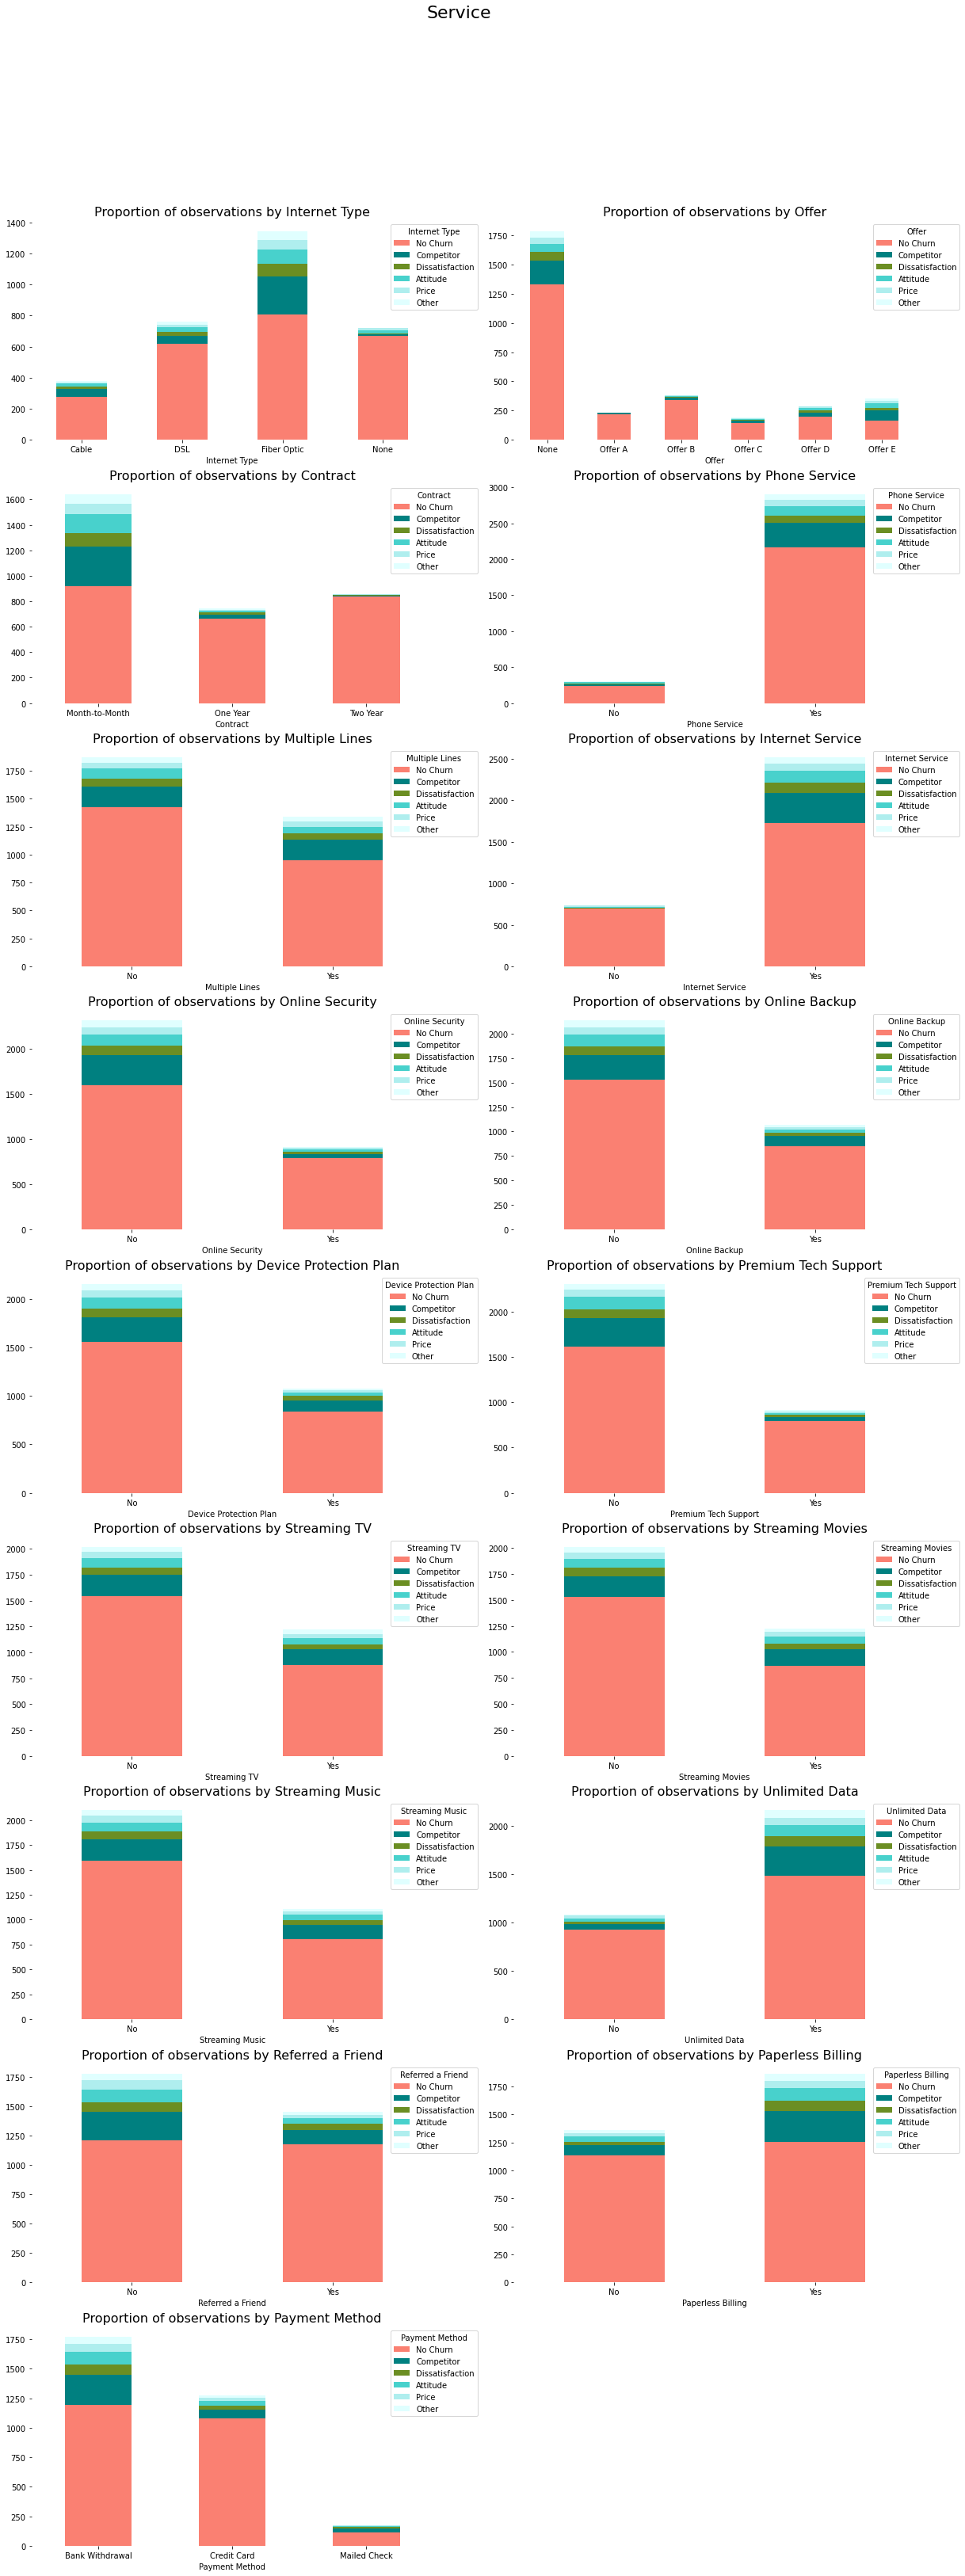

In [ ]:
account_columns = ['Internet Type', 'Offer', 'Contract', 'Phone Service', 'Multiple Lines', 'Internet Service', 
           'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
           'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Referred a Friend', 'Paperless Billing', 'Payment Method']
percentage_stacked_plot(account_columns, 'Service', 'No Churn')

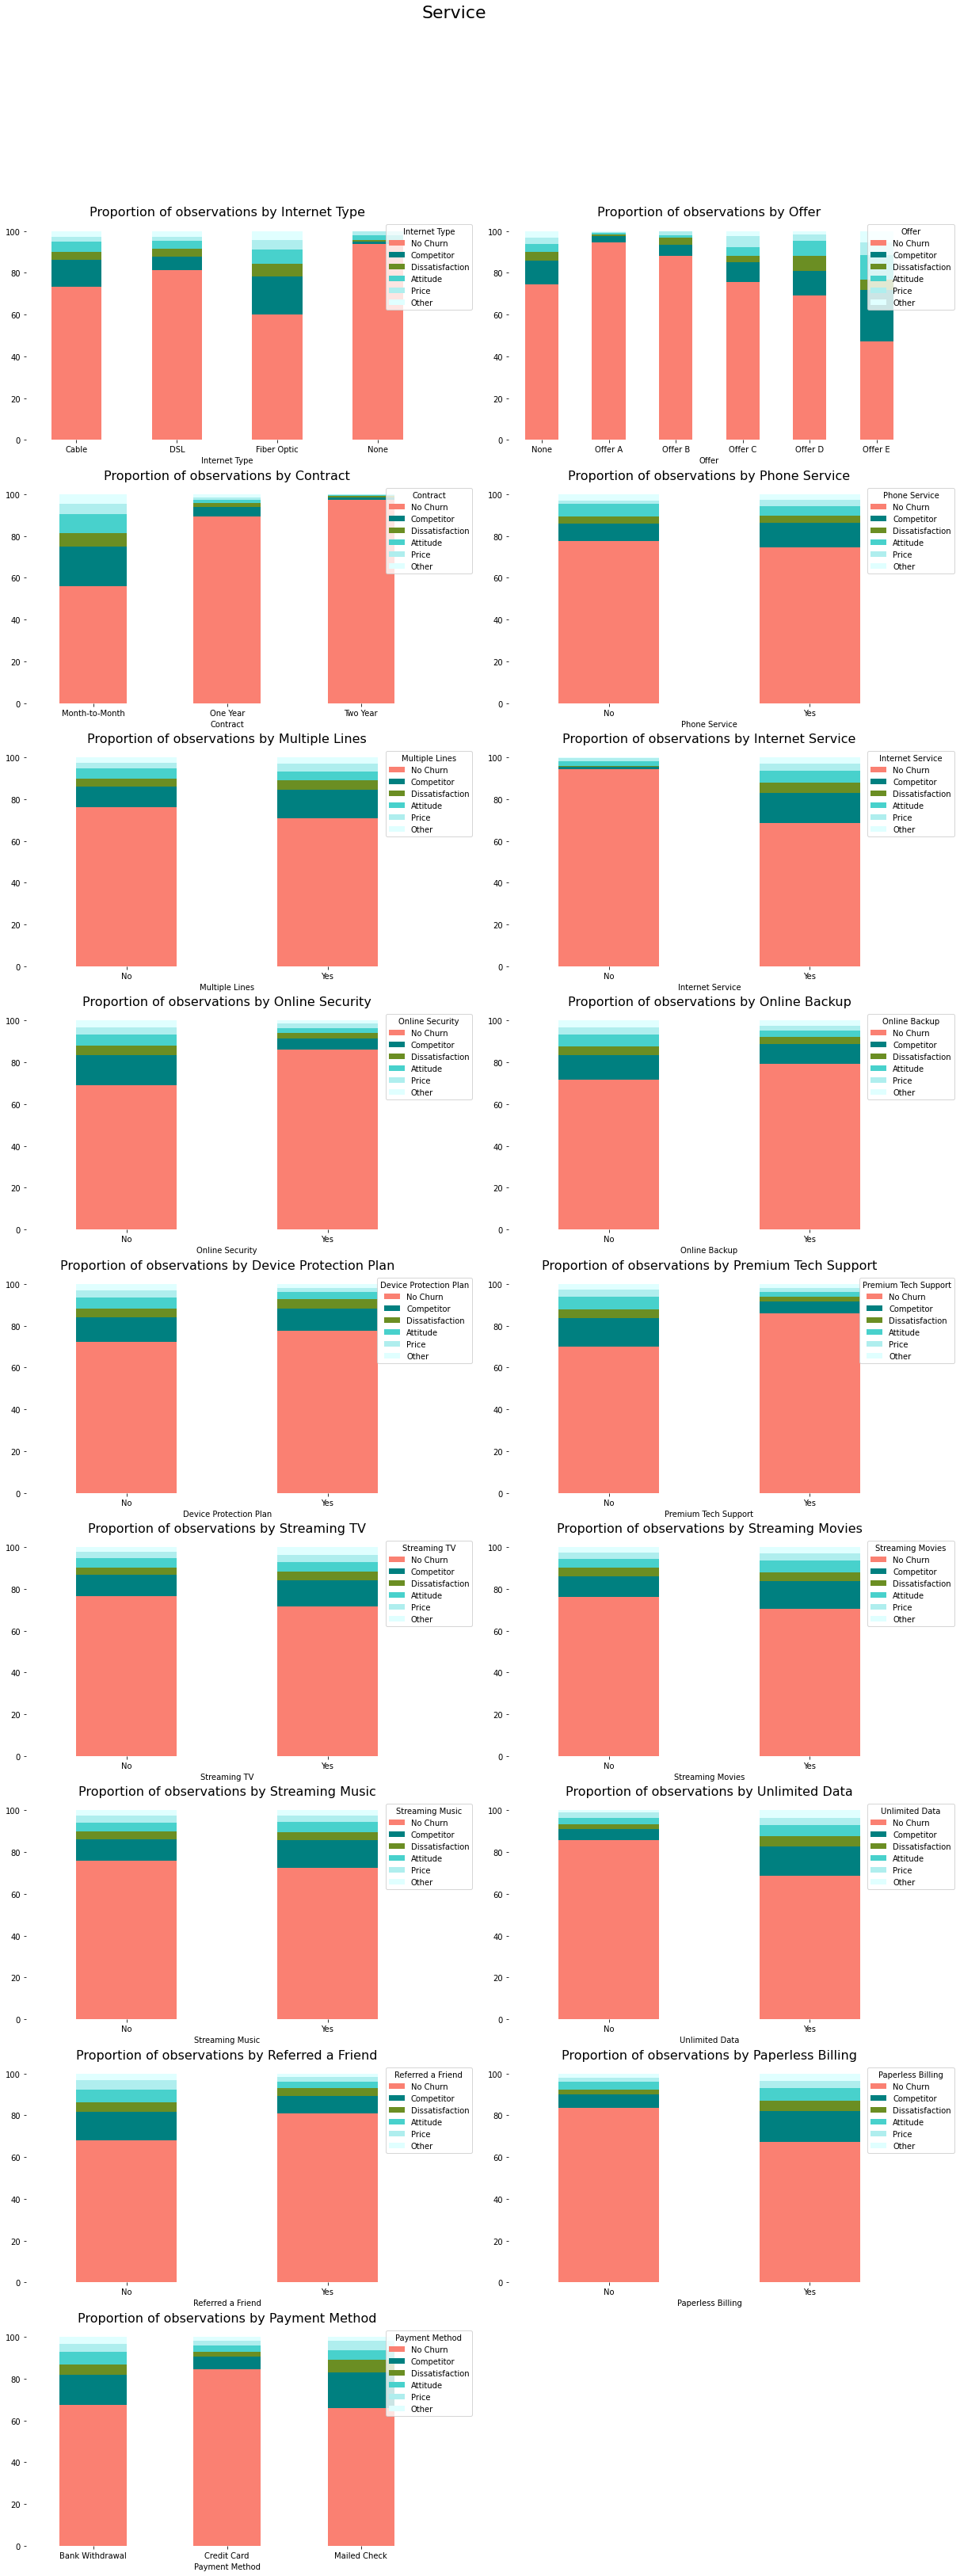

In [ ]:
percentage_stacked_plot(account_columns, 'Service', 'No Churn', perc_mode=True)

### Churn Category Distribution

In [ ]:
def binarize(df_column, match, col_name, match_str, unmatch_str):
    # print( df_column )
    tmp = pd.DataFrame(columns=[col_name])
    # print( tmp )
    tmp[col_name] = np.where(df_column==match, match_str, unmatch_str)
    return tmp

In [ ]:
Counter( alldf['Churn Category'] )

Counter({'Attitude': 201,
         'Competitor': 490,
         'Dissatisfaction': 177,
         'No Churn': 3118,
         'Other': 116,
         'Price': 124,
         nan: 1408})

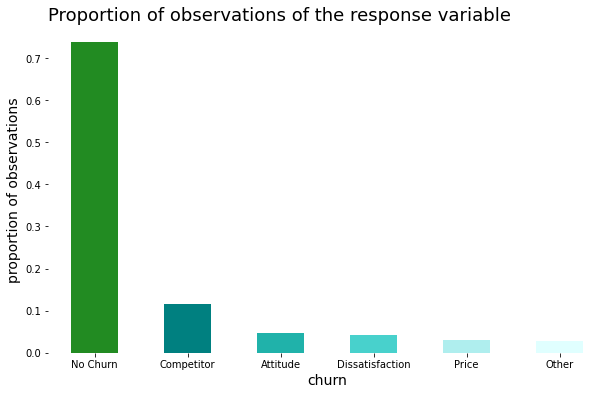

In [ ]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
# prop_response = binarize(alldf['Churn Category'].dropna(), 'No Churn', 'No Churn', 'No Churn', 'Churn for some reasons').value_counts(normalize=True)
prop_response = alldf['Churn Category'].dropna().value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', ax=ax, color=['forestgreen','teal','lightseagreen', 'mediumturquoise',  'paleturquoise', 'lightcyan'])

# set title and labels
ax.set_title('Proportion of observations of the response variable', fontsize=18, loc='left')
ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('proportion of observations', fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

### Demographic Info


In [ ]:
def percentage_stacked_plot(columns_to_plot, super_title, target_label, perc_mode=False):
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(20, 6*number_of_rows)) 
    fig.suptitle(super_title, fontsize=22, y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        order = {'No Churn':0, 'Competitor':1, 'Dissatisfaction':2, 'Attitude':3, 'Price': 4, 'Other': 5}
        prop_by_independent = pd.crosstab(alldf['Churn Category'], alldf[column]).sort_index(key=lambda x: x.map(order))
        if perc_mode:
            prop_by_independent = prop_by_independent.apply(lambda x: x/x.sum()*100, axis=1)

        # ava_colors = ['teal', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'lightcyan']
        ava_colors = ['palevioletred','teal','olivedrab', 'mediumturquoise', 'paleturquoise', 'lightcyan']
        colors = []
        i = 0
        for n in list(prop_by_independent.columns):
          if n != target_label:
            colors.append( ava_colors[i] )
            i += 1
          else:
            colors.append( 'salmon' )

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=colors)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title=column, fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='center')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

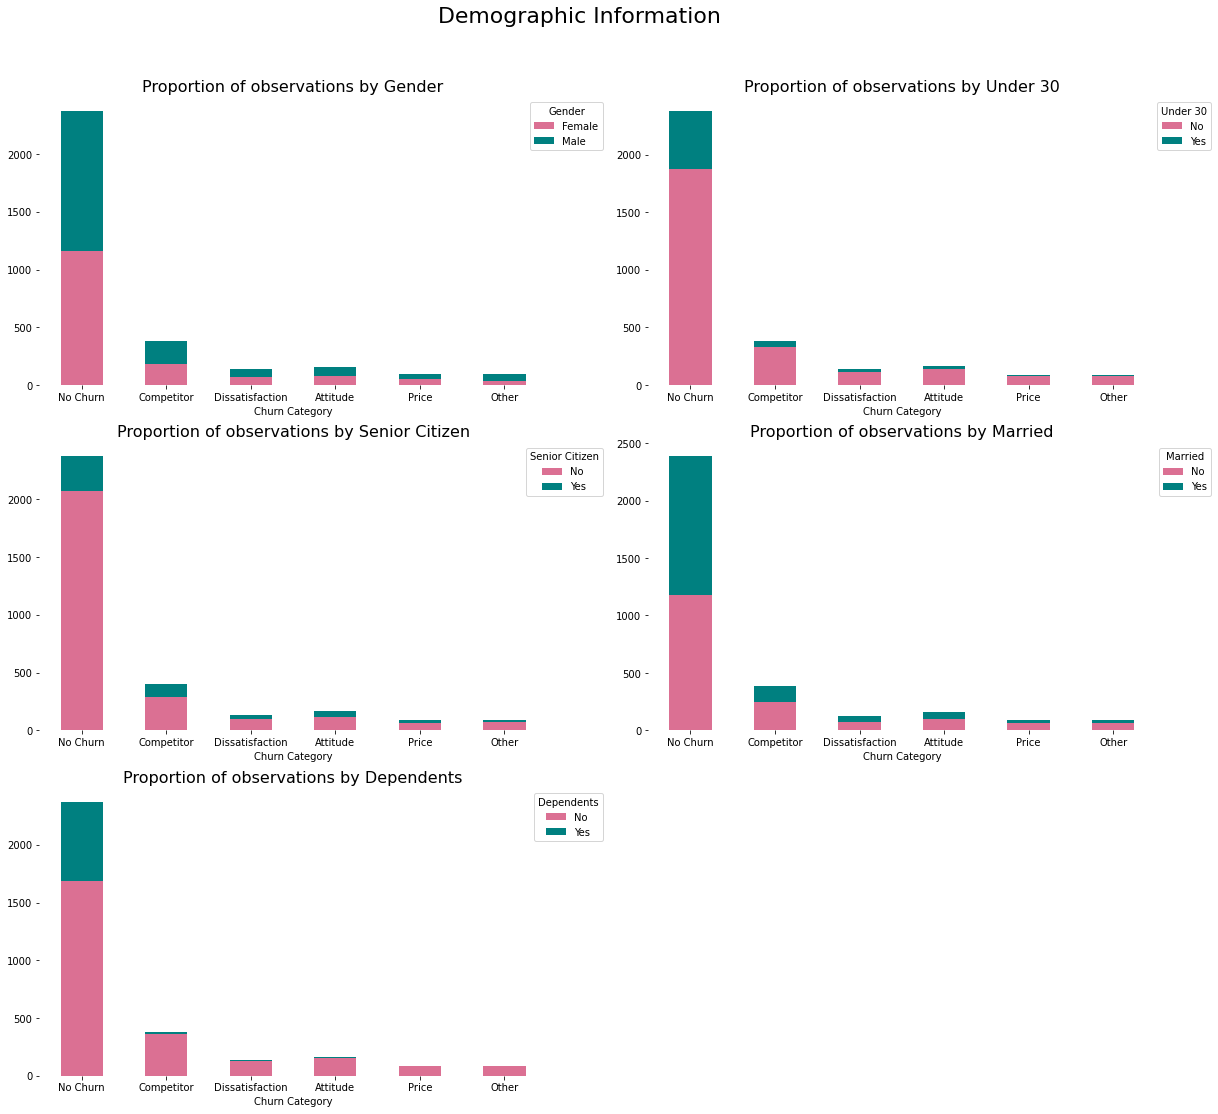

In [ ]:
# demographic column names
demographic_columns = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information', 'No Churn')

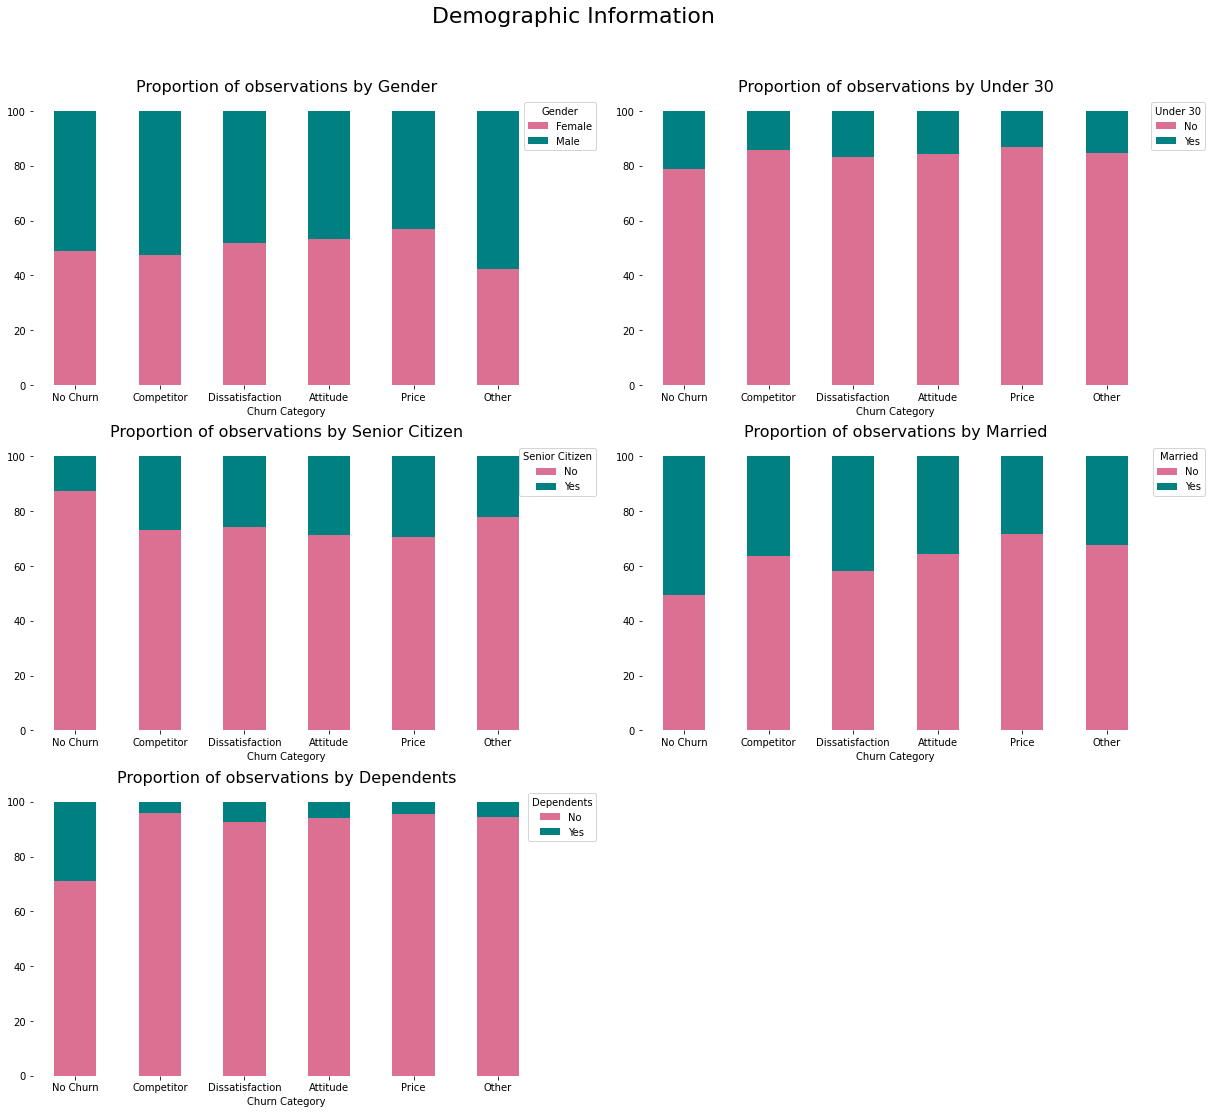

In [ ]:
# demographic column names
demographic_columns = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information', 'No Churn', perc_mode=True)

### Service vs. Churn Cat



In [ ]:
# customer account column names
account_columns = ['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
           'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
           'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']

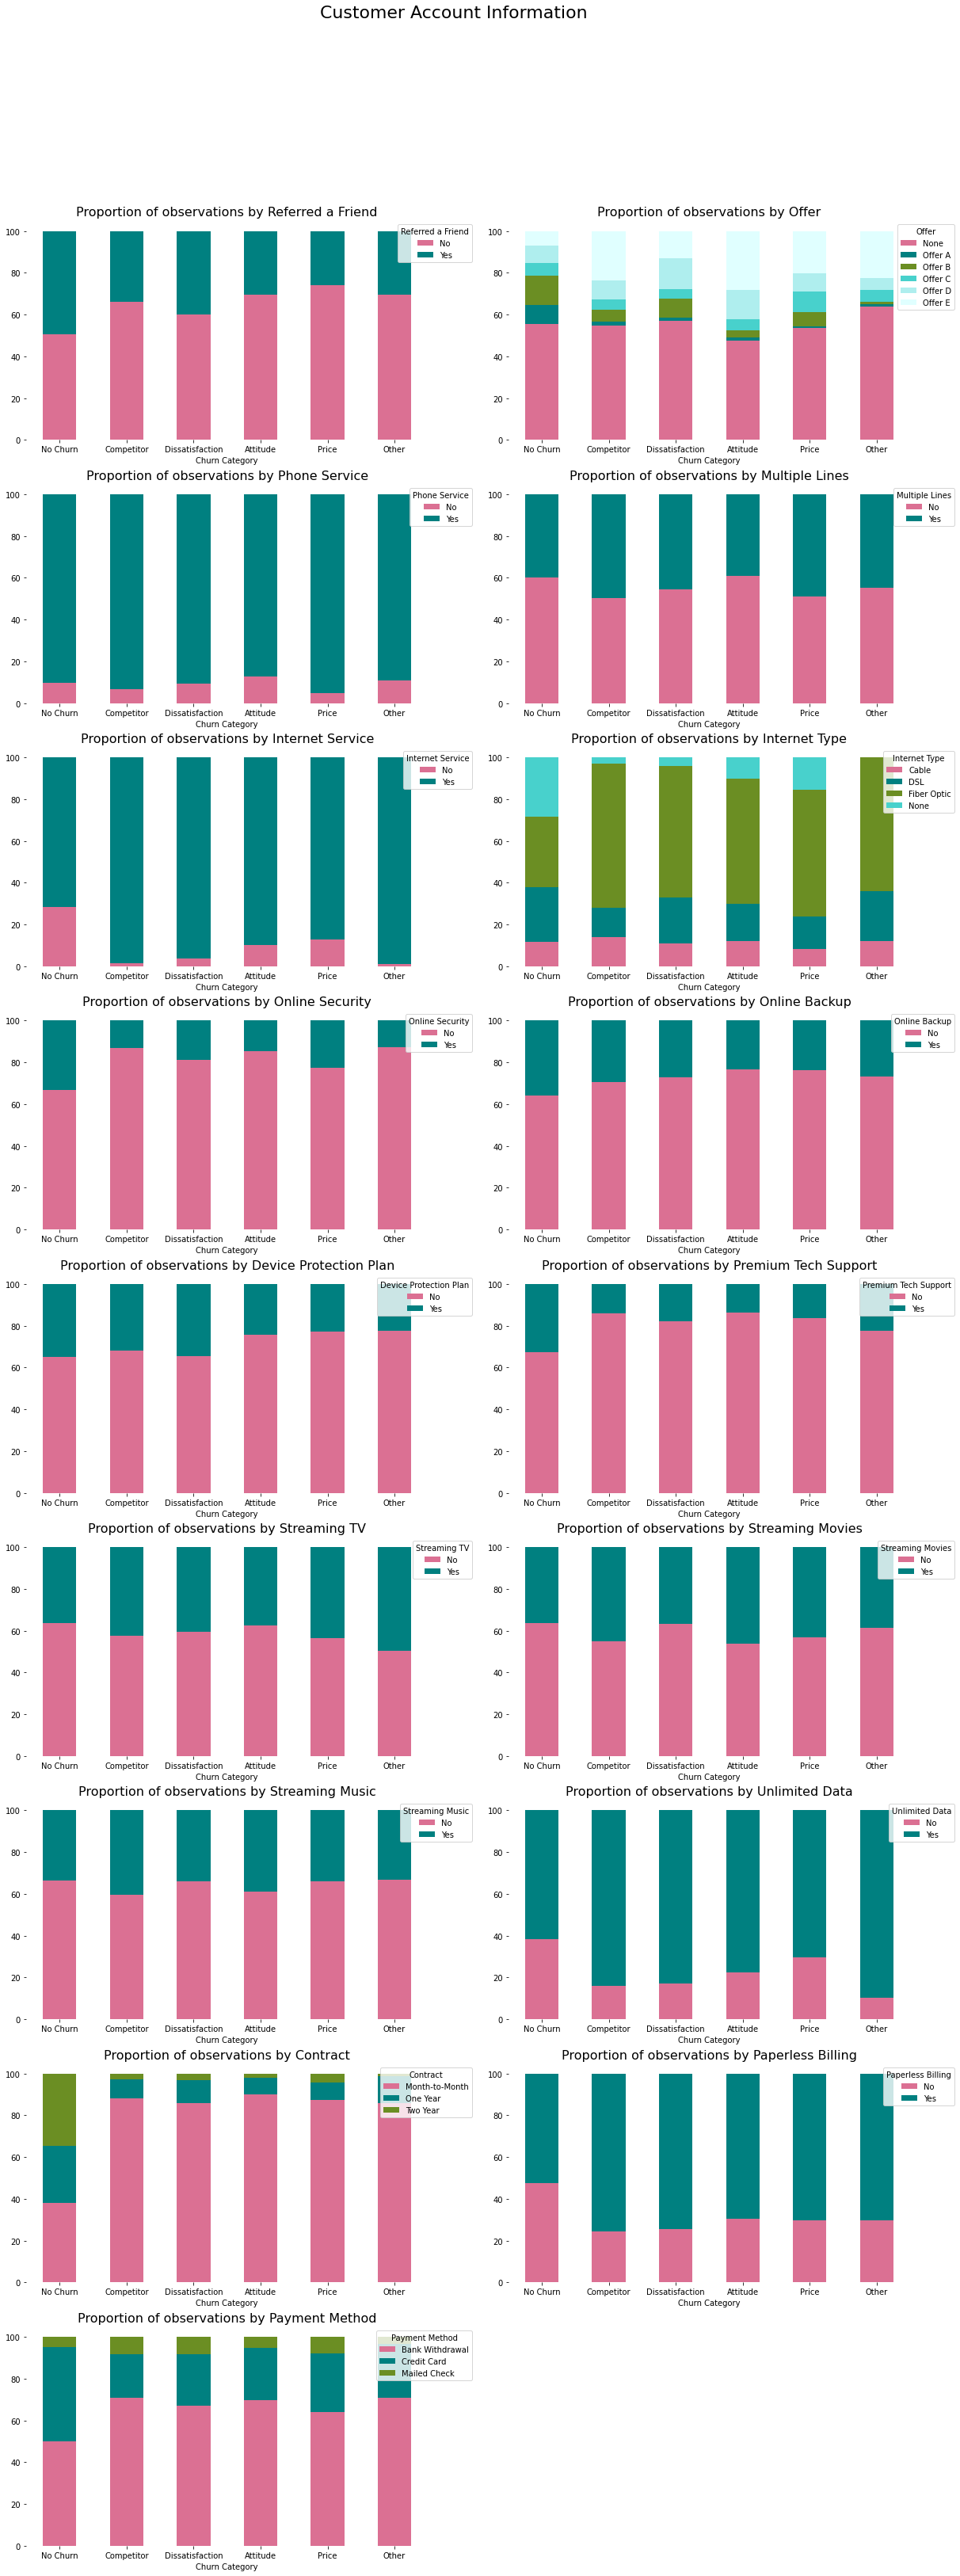

In [ ]:
percentage_stacked_plot(account_columns, 'Customer Account Information', 'No Churn', perc_mode=True)

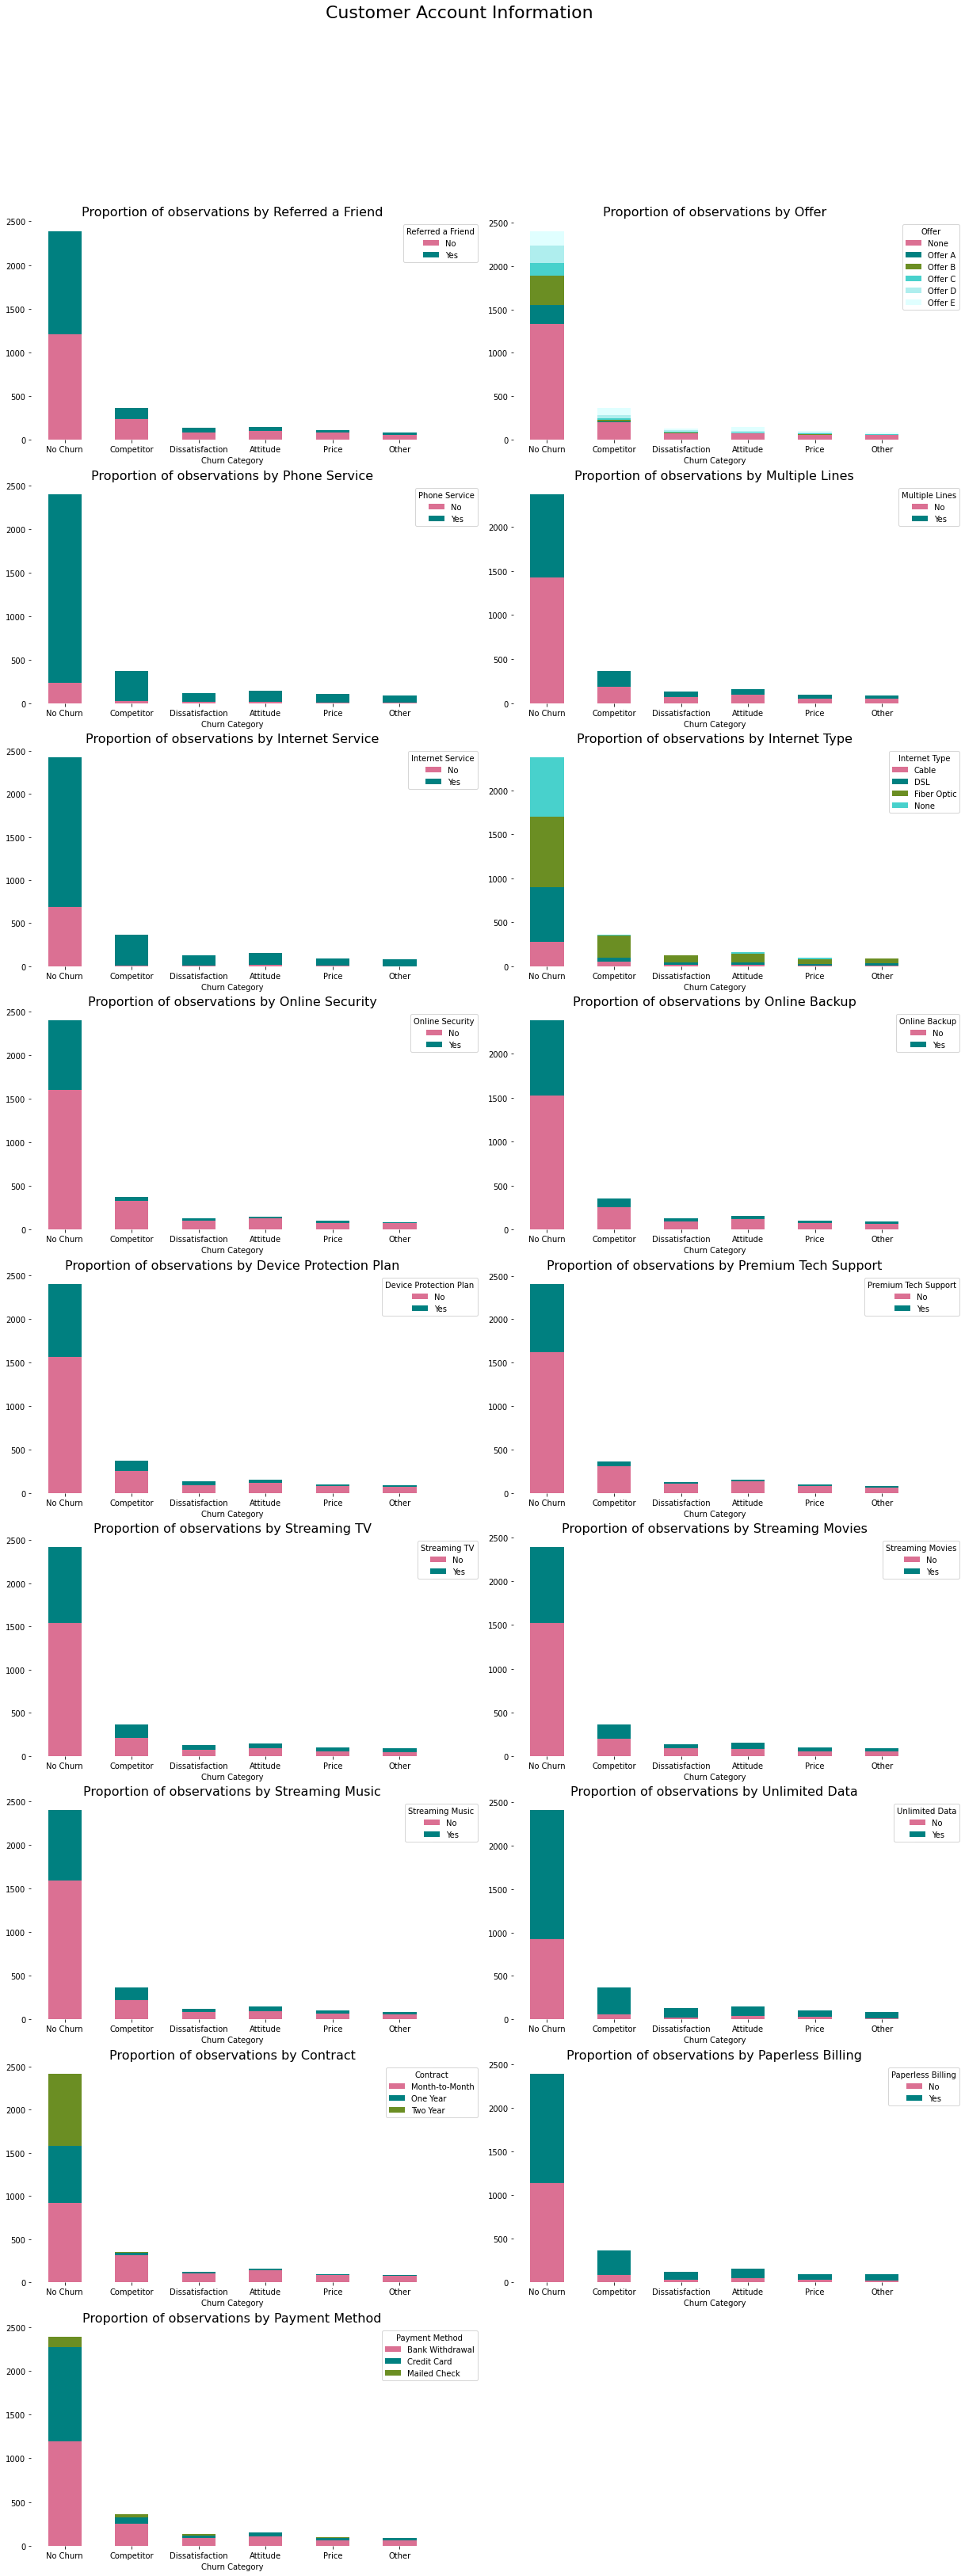

In [ ]:
# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information', 'No Churn')

In [ ]:
percentage_stacked_plot(account_columns, 'Customer Account Information', 'No Churn', perc_mode=True)

In [ ]:
def histogram_plots(columns_to_plot, super_title, target_label=''):
    
    '''
    Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=0.93)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        alldf[alldf['Churn Category']==target_label][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label=target_label)
        alldf[alldf['Churn Category']!=target_label][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='hotpink', label='not '+target_label)
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churned due to', fancybox=True)

        # set title and labels
        ax.set_title(f'Distribution of {column}',
                     fontsize=15, loc='center')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

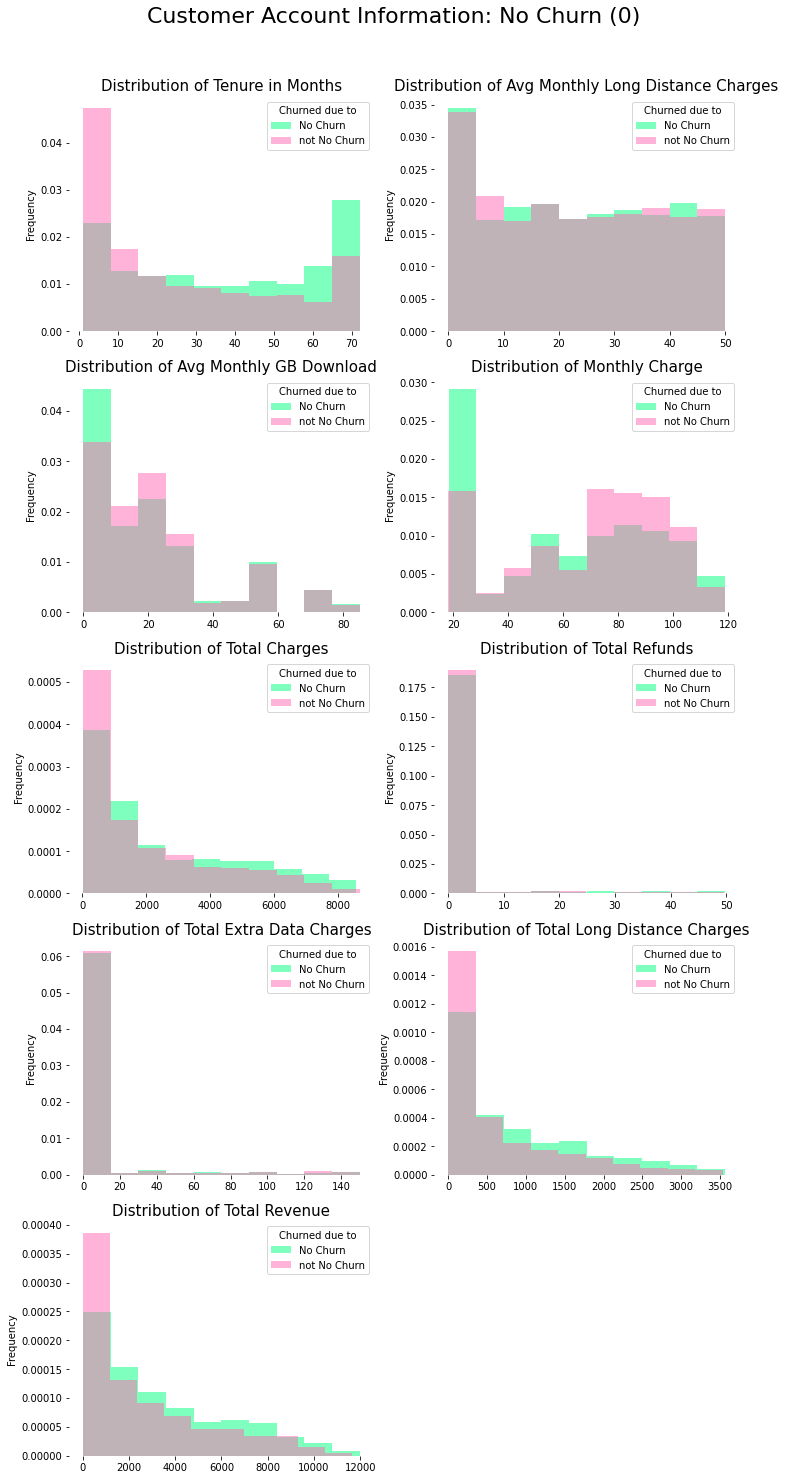

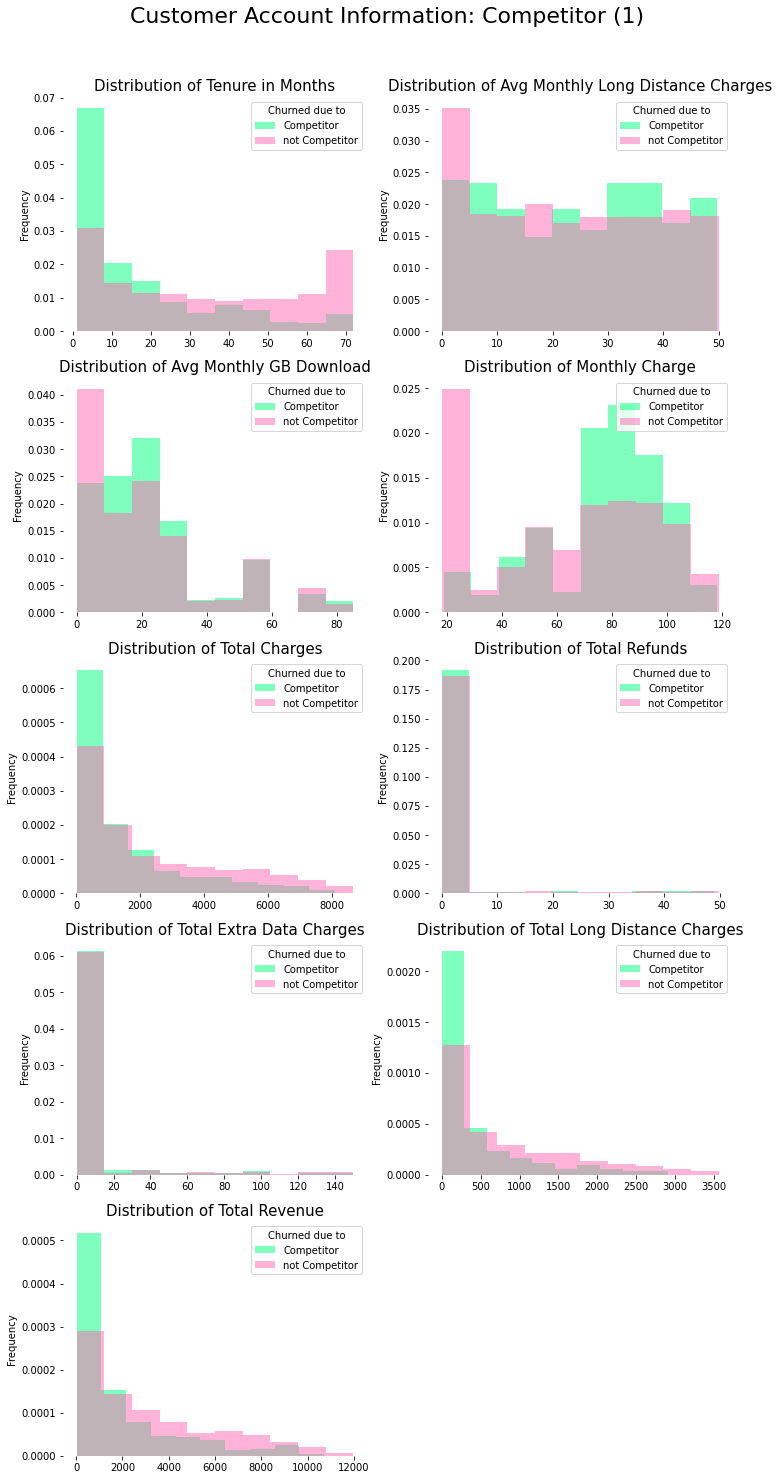

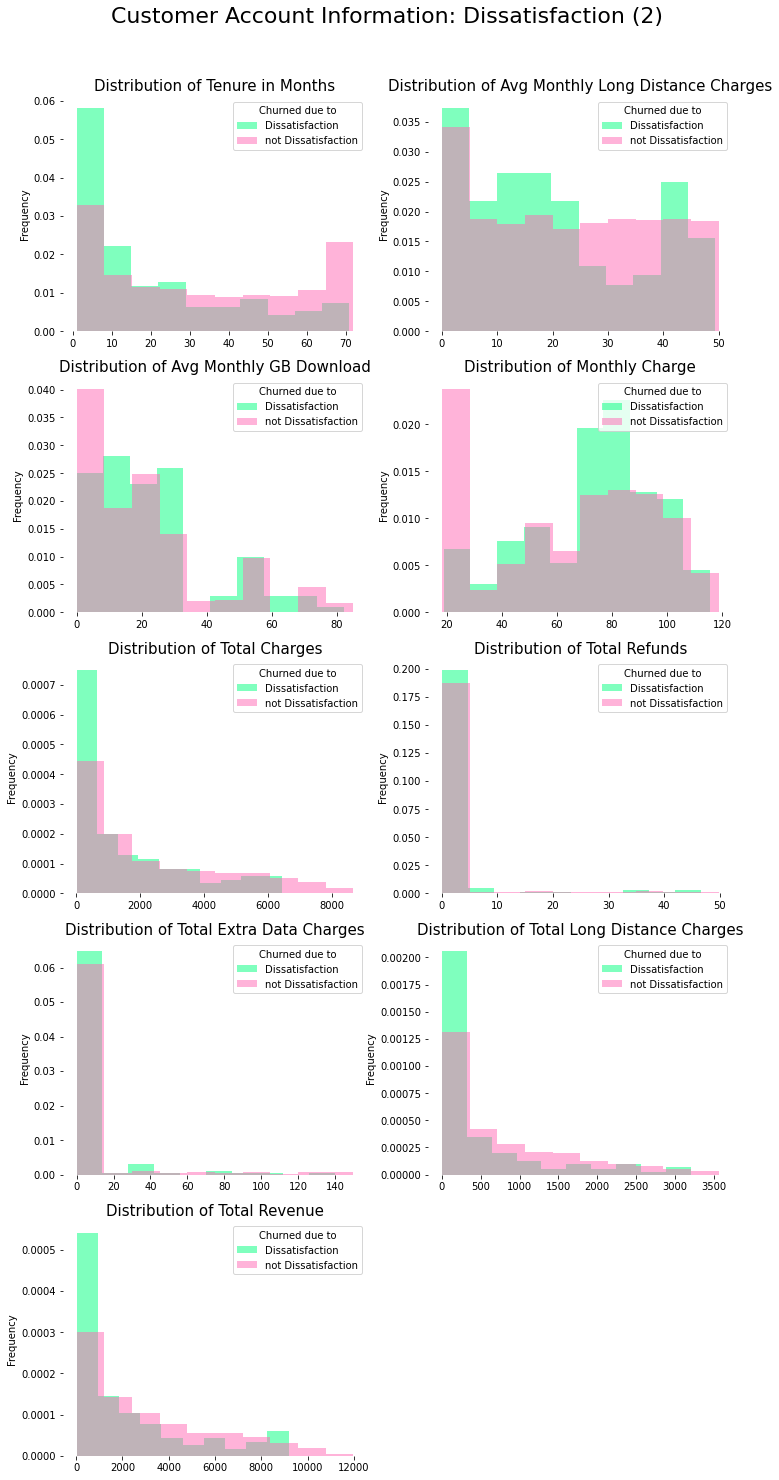

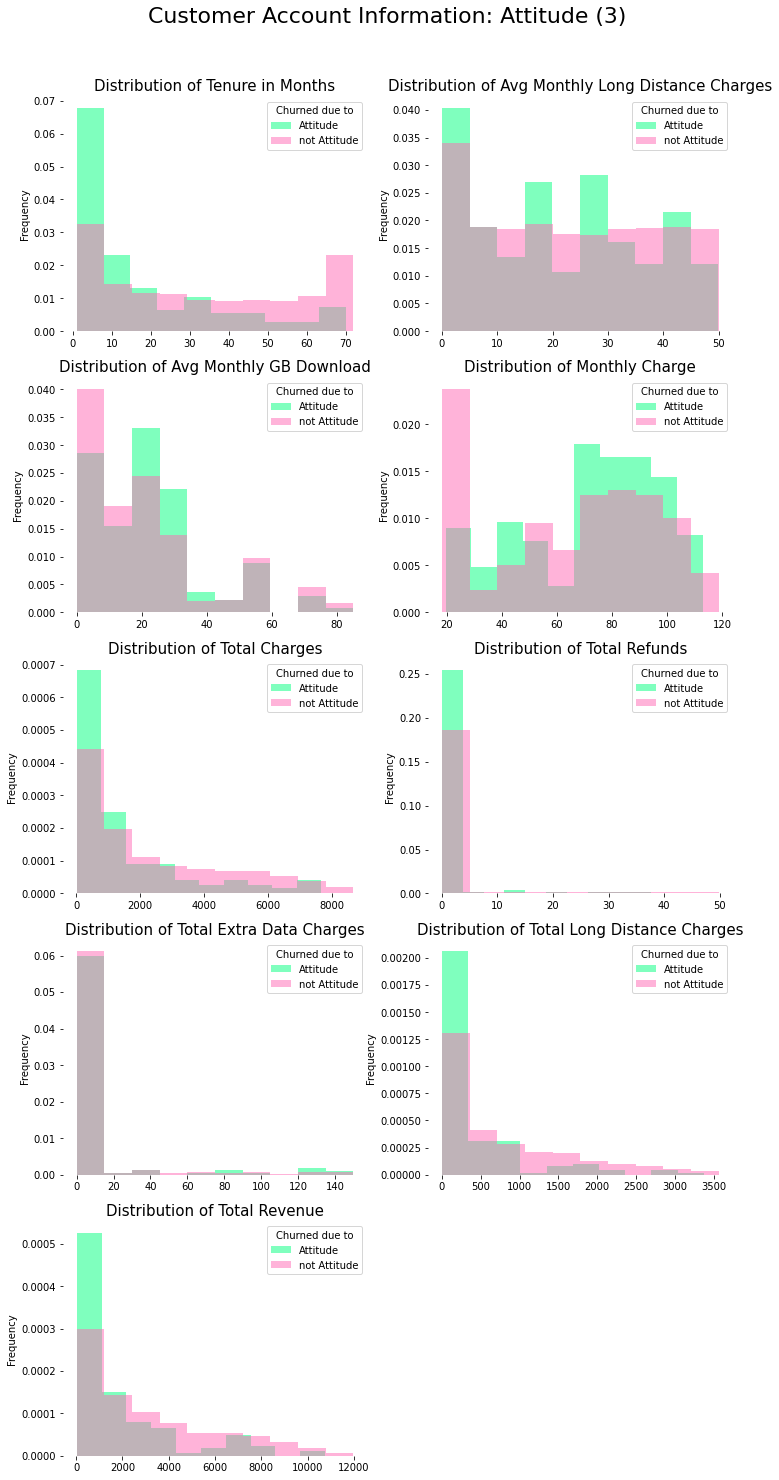

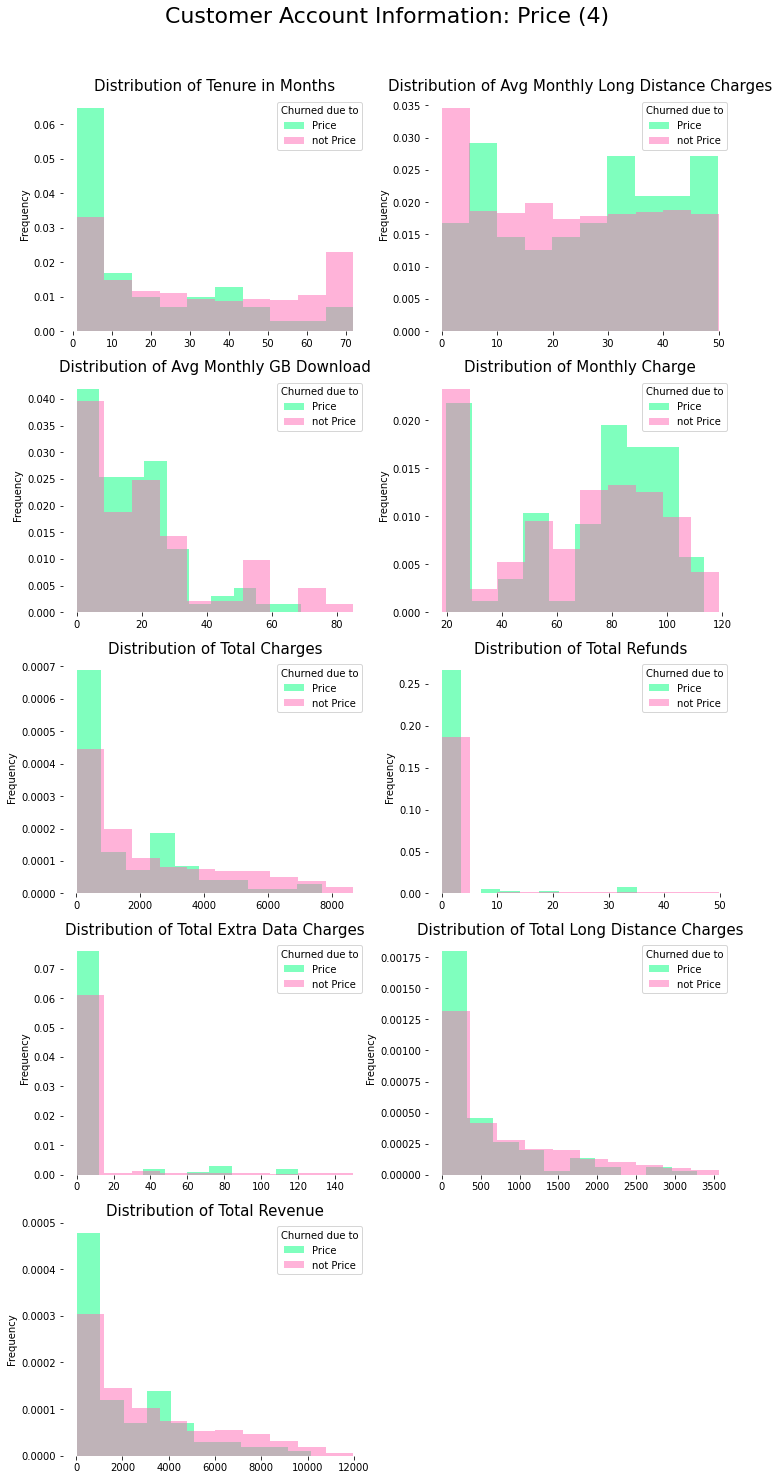

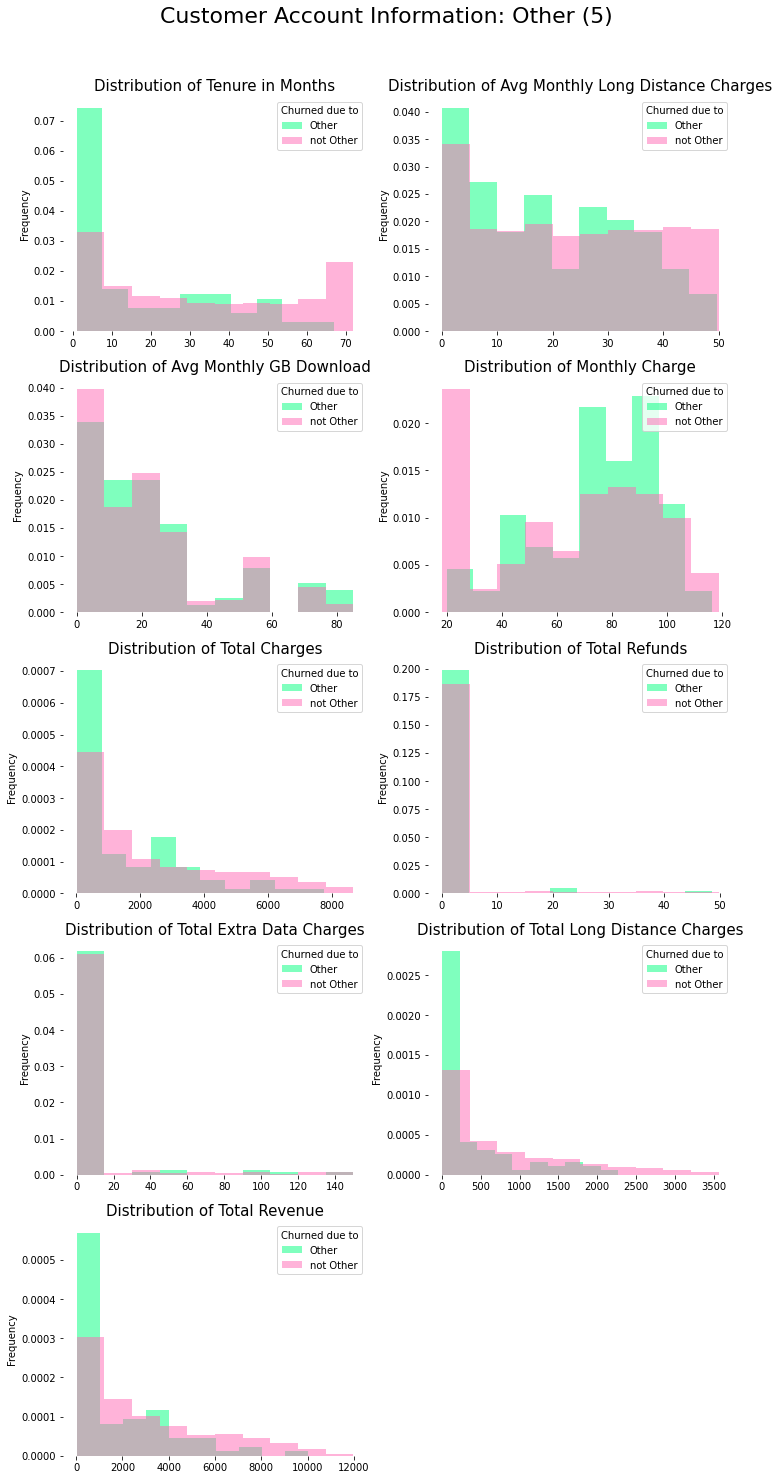

In [ ]:
# customer account column names
account_columns_numeric = ['Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
                'Monthly Charge', 'Total Charges', 'Total Refunds',
              'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
# histogram of costumer account columns
targets = {'No Churn':0, 'Competitor':1, 'Dissatisfaction':2, 'Attitude':3, 'Price': 4, 'Other': 5}
# targets = ['No Churn', 'Attitude', 'Competitor', 'Dissatisfaction', 'Price', 'Other']
for name,code in targets.items():
  histogram_plots(account_columns_numeric, f'Customer Account Information: {name} ({code})', name)

### Satisfaction vs. Churn Cat

In [ ]:
tmp = pd.concat( [alldf['Satisfaction Score'],alldf['Churn Category']], axis=1 )
tmp = tmp[ tmp['Churn Category'].notna() & tmp['Satisfaction Score'].notna() ]

In [ ]:
order = {  'Attitude': 3,
        'Competitor': 1,
        'Dissatisfaction': 2,
        'No Churn': 0,
        'Other': 5,
        'Price': 4}

In [ ]:
tmp

,Satisfaction Score,Churn Category
0,1.0,Competitor
1,1.0,Competitor
3,3.0,Competitor
8,3.0,No Churn
10,3.0,No Churn
...,...,...
5626,5.0,No Churn
5627,4.0,No Churn
5628,3.0,No Churn
5631,4.0,No Churn


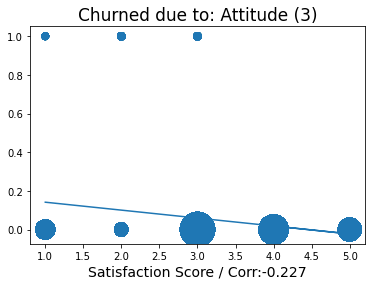

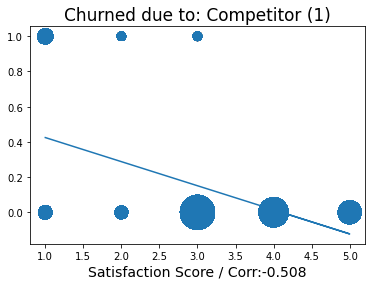

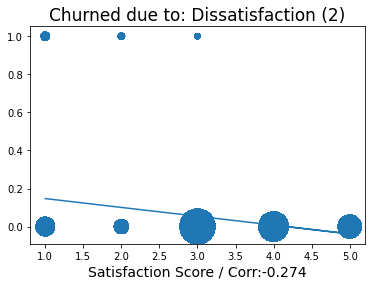

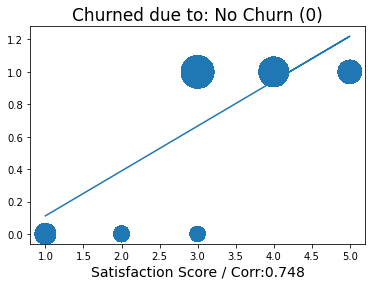

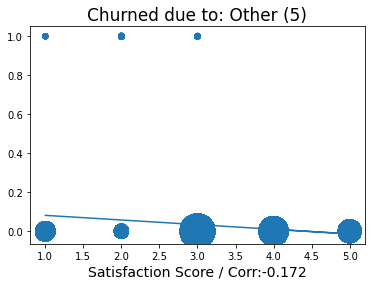

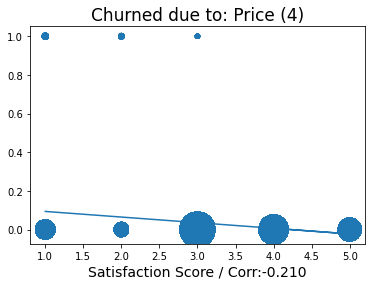

In [ ]:
# cnts = {'pos': , 'neg':}

for cls, code in order.items():
    x = np.array(tmp['Satisfaction Score'])
    y = np.where(tmp['Churn Category']==cls, 1, 0)

    cnt_pos = Counter(tmp['Satisfaction Score'][np.where(tmp['Churn Category']==cls, 1, 0)==1])
    cnt_neg = Counter(tmp['Satisfaction Score'][np.where(tmp['Churn Category']==cls, 1, 0)==0])
    cnt = Counter(x)

    # sns.regplot(x, y, ci=True)
    s = [cnt_pos[val] if y[i]==1 else cnt_neg[val] for i,val in enumerate(x) ]
    plt.scatter(x, y, s=s)
    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b)
    plt.title(f"Churned due to: {cls} ({code})", fontsize=17)
    plt.xlabel(f'Satisfaction Score / Corr:{np.corrcoef(x,y)[0][1]:.3f}', fontsize=14)
    plt.show()

    # print(f'Corr:{np.corrcoef(x,y)[0][1]}')

### Population vs Churn Cat

In [ ]:
tmp = pd.concat( [alldf['Population'],alldf['Churn Category']], axis=1 )
tmp = tmp[ tmp['Churn Category'].notna() & tmp['Population'].notna() ]

Corr:-0.043323361274128794 Slope=-8.863554824542612e-07


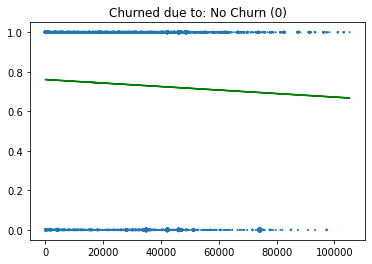

Corr:0.048745428018390616 Slope=7.199174035455562e-07


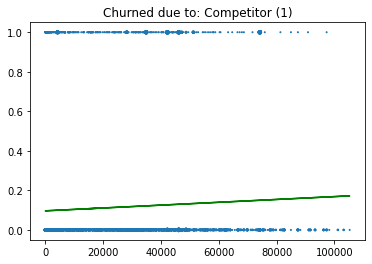

Corr:0.0030082379178937905 Slope=2.7476990633267396e-08


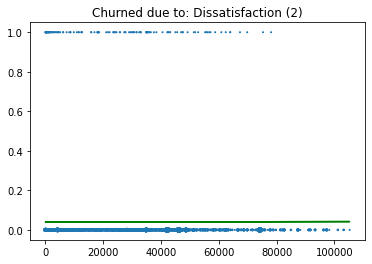

Corr:0.020289678437534268 Slope=2.0475206741934212e-07


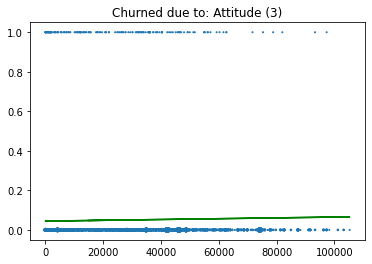

Corr:-0.008468382503830574 Slope=-6.674035257773482e-08


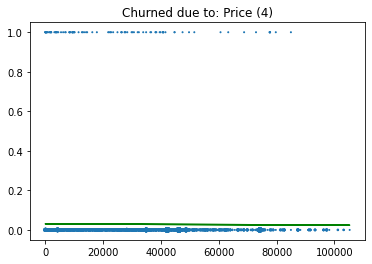

Corr:0.00012300243420542705 Slope=9.493734338206864e-10


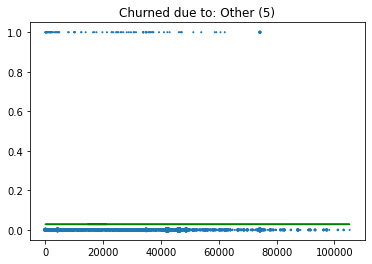

In [ ]:
# cnts = {'pos': , 'neg':}

for cls, code in order.items():
    x = np.array(tmp['Population'])
    y = np.where(tmp['Churn Category']==cls, 1, 0)

    cnt_pos = Counter(tmp['Population'][np.where(tmp['Churn Category']==cls, 1, 0)==1])
    cnt_neg = Counter(tmp['Population'][np.where(tmp['Churn Category']==cls, 1, 0)==0])

    # print(cnt_pos)
    # print(cnt_neg)

    # sns.regplot(x, y, ci=True)
    s = [cnt_pos[val] if y[i]==1 else cnt_neg[val] for i,val in enumerate(x) ]
    plt.scatter(x, y, s=s)
    m, b = np.polyfit(x, y, 1)

    # print(np.corrcoef(x,y))
    print(f'Corr:{np.corrcoef(x,y)[0][1]} Slope={m}')

    plt.plot(x, m*x + b, color='green')
    plt.title(f"Churned due to: {cls} ({code})")
    plt.show()

# Check Feature Importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## categorical data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MachineLearning/Data/test.csv')

In [ ]:
train

,Customer ID,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,...,City_Zenia,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn Category
0,0650-BWOZN,37.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,35.0,NaN,16.0,12.0,85.15,3030.60,0.0,0.0,892.85,3923.45,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0562-FGDCR,54.0,0.0,NaN,0.0,0.0,0.0,0.0,14931.0,34.903052,-118.411251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.00,29.0,1.0,35.90,35.90,0.0,0.0,0.00,35.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0
2,6688-UZPWD,NaN,NaN,1.0,1.0,0.0,NaN,1.0,32304.0,33.721917,-118.043237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,4.0,35.0,41.02,NaN,12.0,20.05,746.75,NaN,0.0,1435.70,2182.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
3,2905-KFQUV,23.0,0.0,1.0,1.0,0.0,0.0,0.0,37570.0,37.305622,-122.000887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,7.0,21.58,71.0,1.0,74.65,544.55,0.0,10.0,NaN,705.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0
4,9720-JJJOR,41.0,0.0,0.0,0.0,NaN,1.0,0.0,322.0,39.672813,-120.456699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,8.0,68.0,17.12,0.0,24.0,25.80,1911.50,0.0,NaN,1164.16,3075.66,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1178-PZGAB,27.0,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,0.0,1.0,42.15,0.0,1.0,20.20,20.20,NaN,0.0,42.15,62.35,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
5630,4806-KEXQR,50.0,0.0,0.0,0.0,0.0,0.0,NaN,173.0,37.140104,-119.657092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,40.0,18.57,NaN,N

In [ ]:
test

,Customer ID,Age,Number of Dependents,IsMale,IsUnder30,IsSenior,IsMarried,HasDependents,Population,Latitude,Longitude,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,...,City_Zenia,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Bin Referred a Friend,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Bin Phone Service,Bin Multiple Lines,Bin Internet Service,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Bin Online Security,Bin Online Backup,Bin Device Protection Plan,Bin Premium Tech Support,Bin Streaming TV,Bin Streaming Movies,Bin Streaming Music,Bin Unlimited Data,Bin Paperless Billing,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Churn Category
0,9938-EKRGF,73.0,0.0,0.0,0.0,1.0,1.0,0.0,48690.0,33.141265,-116.967221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,47.0,26.95,26.0,1.0,70.55,NaN,NaN,0.0,1266.65,4548.91,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1,7379-POKDZ,64.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,34.231318,-117.662032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,50.0,47.16,0.0,24.0,24.90,1195.25,0.00,0.0,2358.00,3553.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,0654-HMSHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21866.0,32.802959,-117.027095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,9.0,52.0,10.40,85.0,12.0,75.40,3865.45,0.00,NaN,540.80,4406.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN
3,2045-BMBTJ,35.0,3.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,11.0,29.01,0.0,1.0,19.25,180.30,0.00,0.0,319.11,499.41,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,NaN
4,0701-TJSEF,67.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,33.581045,-117.147190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1.0,13.0,31.70,6.0,1.0,95.25,1233.65,48.09,0.0,412.10,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4587-VVTOX,49.0,NaN,1.0,0.0,0.0,0.0,0.0,21205.0,37.871416,-122.246597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,15.0,5.54,0.0,12.0,NaN,304.60,0.00,0.0,83.10,387.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
1405,7716-YTYHG,78.0,0.0,0.0,0.0,1.0,0.0,0.0,21418.0,40.448632,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN

In [ ]:
train.isna().sum().sum(), 5634*1151

(818813, 6484734)

In [ ]:
train.isna().sum().sum() / (5634*1151)

0.12626778523220844

In [ ]:
train[ train['Churn Category'].notna() ]

In [ ]:
from sklearn.metrics import mutual_info_score
from sklearn.impute import SimpleImputer

In [ ]:
to_drop = ['Customer ID','Age','Number of Dependents','Population','Latitude','Longitude','Satisfaction Score',
           'Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
           'Avg Monthly GB Download','Contract','Monthly Charge','Total Charges','Total Refunds',
           'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

imp = SimpleImputer( missing_values = np.nan, strategy='most_frequent' )
tmp = train[ train['Churn Category'].notna() ]

allcolnames = tmp.columns

Y = pd.get_dummies( tmp['Churn Category'] )
tmp = pd.concat( [tmp , Y] , axis=1 ).drop(columns=['Churn Category'])

Y = tmp[[0.0,1.0,2.0,3.0,4.0,5.0]]

tmp = tmp.drop(columns=[0.0,1.0,2.0,3.0,4.0,5.0])

# X = imp.fit( train.drop(columns=['Customer ID'], axis=1).to_numpy() )

In [ ]:
list(allcolnames).index('City_San Diego')

860

In [ ]:
X = tmp.drop(columns=to_drop, axis=1).to_numpy()

In [ ]:
X

array([[ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [nan,  0.,  0., ..., nan, nan, nan],
       [ 1.,  1.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [nan,  0.,  1., ...,  1.,  0.,  0.]])

In [ ]:
X.shape

(4226, 1132)

In [ ]:
imp = imp.fit( X )

In [ ]:
trainX = imp.transform(X)

In [ ]:
col_name = [x for x in list(train.columns) if x not in to_drop+['Churn Category']]

In [ ]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    global i
    return mutual_info_score(categorical_serie, Y[i] )

for i in range(6):
    # select categorial variables excluding the response variable 
    # categorical_variables = train.select_dtypes(include=object).drop(columns=['Churn Category'], axis=1)
    categorical_variables = pd.DataFrame(data=trainX, columns=col_name)

    # compute the mutual information score between each categorical variable and the target
    feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
    
    print(f'\n>>>>>>>>>>>>>> Class {i} <<<<<<<<<<<<<<')
    print( feature_importance.head(10) )


>>>>>>>>>>>>>> Class 0 <<<<<<<<<<<<<<
Bin Internet Service          0.029654
HasDependents                 0.027499
Internet Type_None            0.025905
Internet Type_Fiber Optic     0.022510
Offer_Offer E                 0.014755
Payment Method_Credit Card    0.014131
Bin Unlimited Data            0.013865
Bin Paperless Billing         0.012101
Bin Online Security           0.011930
Bin Premium Tech Support      0.011835
dtype: float64

>>>>>>>>>>>>>> Class 1 <<<<<<<<<<<<<<
Bin Internet Service          0.017946
Internet Type_None            0.014963
City_San Diego                0.014165
HasDependents                 0.012665
Internet Type_Fiber Optic     0.009806
Payment Method_Credit Card    0.007948
Bin Unlimited Data            0.007227
Bin Paperless Billing         0.006244
Bin Online Security           0.006172
Offer_Offer E                 0.006081
dtype: float64

>>>>>>>>>>>>>> Class 2 <<<<<<<<<<<<<<
Bin Internet Service          0.004563
Internet Type_None            0.00

Question: Is San Diego really an important feature?

## continuous variable

In [ ]:
conti = ['Age','Number of Dependents','Population','Latitude','Longitude','Satisfaction Score',
           'Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
           'Avg Monthly GB Download','Contract','Monthly Charge','Total Charges','Total Refunds',
           'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

# df_corr = train[conti].corr()

In [ ]:
imp = SimpleImputer( missing_values = np.nan, strategy='mean' )
X = train[conti].to_numpy()
imp = imp.fit( X )
trainX = imp.transform(X)

y = train['Churn Category']

In [ ]:
trainX = (trainX-trainX.mean())/trainX.std()
trainX

In [ ]:
tmp = pd.concat( [pd.DataFrame(data=trainX, columns=conti) , pd.DataFrame(data=y, columns=['Churn Category'])] , axis=1 )
tmp = tmp[tmp['Churn Category'].notna()]

In [ ]:
Y = pd.get_dummies( tmp['Churn Category'] )
tmp = pd.concat( [tmp , Y] , axis=1 ).drop(columns=['Churn Category'])

In [ ]:
Y = tmp[[0.0,1.0,2.0,3.0,4.0,5.0]]

In [ ]:
tmp = tmp.drop(columns=[0.0,1.0,2.0,3.0,4.0,5.0])

In [ ]:
df_corrs = []
for i in range(6):
    df = pd.concat( [tmp , Y[float(i)]] , axis=1 )
    df_corrs.append( df.corr() )

In [ ]:
# df_corr['Churn Category'].sort_values()

In [ ]:
# df_corr['Churn Category'].abs().sort_values()

Class 0
Monthly Charge                      -0.172535
Age                                 -0.116292
Avg Monthly GB Download             -0.043666
Population                          -0.037716
Longitude                           -0.013783
Total Extra Data Charges            -0.002733
Avg Monthly Long Distance Charges    0.001154
Total Refunds                        0.029425
Latitude                             0.040292
Total Charges                        0.177124
Number of Dependents                 0.187050
Total Long Distance Charges          0.195818
Total Revenue                        0.197233
Number of Referrals                  0.232185
Tenure in Months                     0.312403
Contract                             0.363383
Satisfaction Score                   0.654099
0.0                                  1.000000
Name: 0.0, dtype: float64
Avg Monthly Long Distance Charges    0.001154
Total Extra Data Charges             0.002733
Longitude                            0.013783


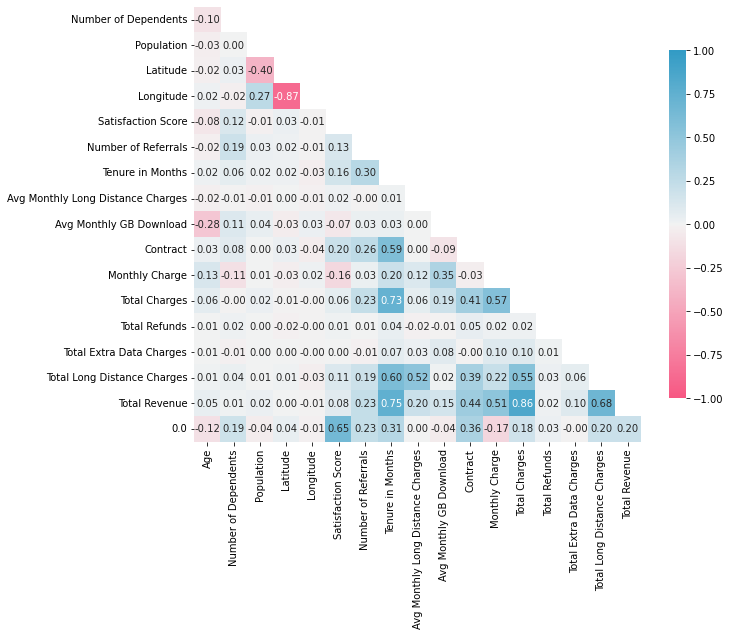

Class 1
Satisfaction Score                  -0.443571
Contract                            -0.215433
Tenure in Months                    -0.191332
Number of Referrals                 -0.138465
Number of Dependents                -0.131227
Total Long Distance Charges         -0.124422
Total Revenue                       -0.122349
Total Charges                       -0.106419
Latitude                            -0.053487
Total Extra Data Charges            -0.009120
Total Refunds                       -0.004966
Avg Monthly Long Distance Charges    0.028094
Longitude                            0.032929
Population                           0.042062
Avg Monthly GB Download              0.043278
Age                                  0.070174
Monthly Charge                       0.127749
1.0                                  1.000000
Name: 1.0, dtype: float64
Total Refunds                        0.004966
Total Extra Data Charges             0.009120
Avg Monthly Long Distance Charges    0.028094


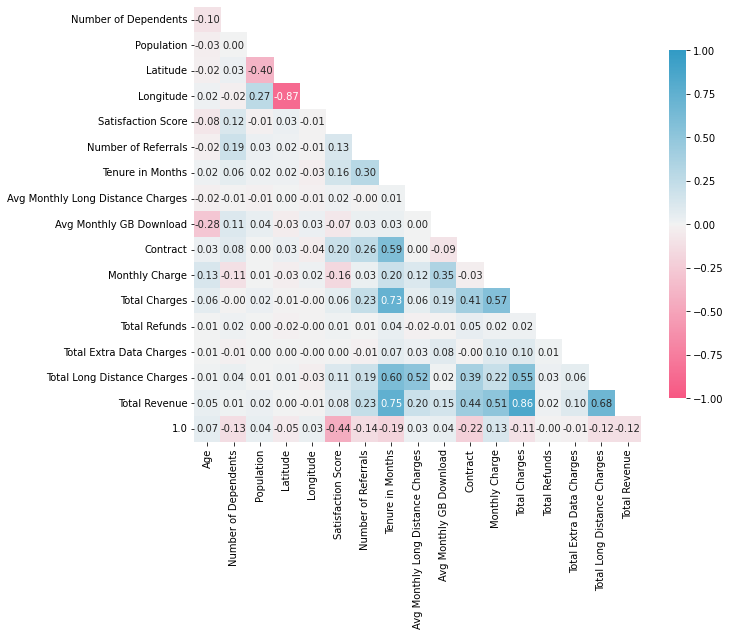

Class 2
Satisfaction Score                  -0.240528
Contract                            -0.116663
Tenure in Months                    -0.096363
Number of Referrals                 -0.067642
Total Charges                       -0.055005
Number of Dependents                -0.054724
Total Revenue                       -0.053566
Total Long Distance Charges         -0.052470
Longitude                           -0.037831
Avg Monthly Long Distance Charges   -0.028111
Total Extra Data Charges            -0.004697
Total Refunds                       -0.002584
Population                           0.002485
Avg Monthly GB Download              0.018890
Age                                  0.026880
Latitude                             0.035284
Monthly Charge                       0.054206
2.0                                  1.000000
Name: 2.0, dtype: float64
Population                           0.002485
Total Refunds                        0.002584
Total Extra Data Charges             0.004697


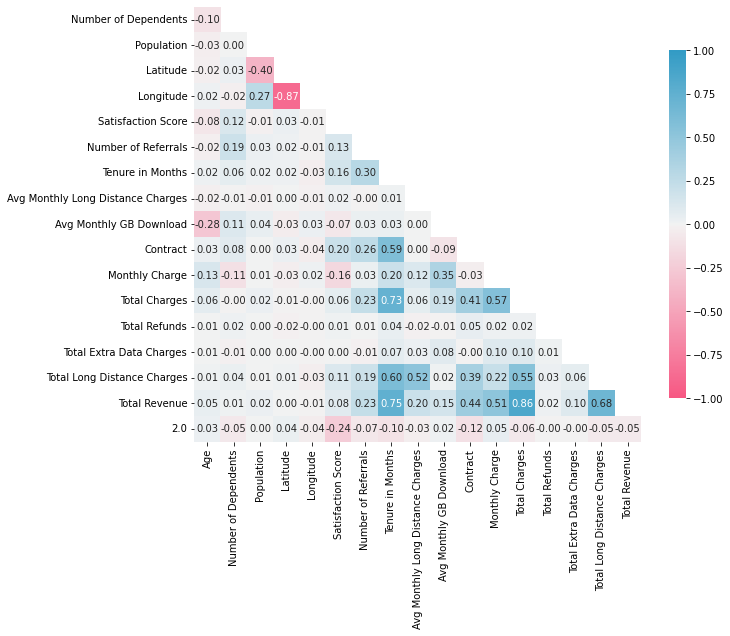

Class 3
Satisfaction Score                  -0.200123
Contract                            -0.154102
Tenure in Months                    -0.123778
Number of Referrals                 -0.095472
Total Long Distance Charges         -0.084363
Total Revenue                       -0.082718
Total Charges                       -0.073123
Number of Dependents                -0.060016
Latitude                            -0.044834
Total Refunds                       -0.026547
Avg Monthly Long Distance Charges   -0.015838
Avg Monthly GB Download              0.017726
Population                           0.018094
Total Extra Data Charges             0.022751
Longitude                            0.023231
Monthly Charge                       0.050382
Age                                  0.053238
3.0                                  1.000000
Name: 3.0, dtype: float64
Avg Monthly Long Distance Charges    0.015838
Avg Monthly GB Download              0.017726
Population                           0.018094


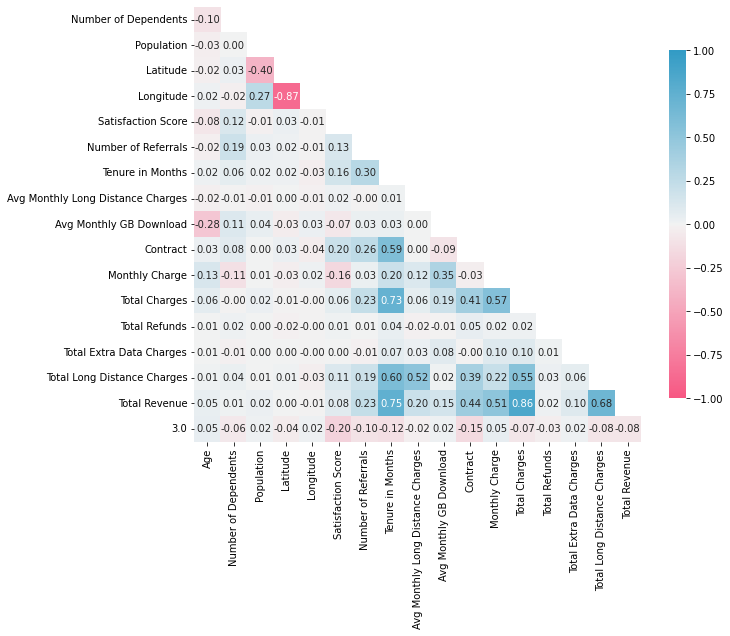

Class 4
Satisfaction Score                  -0.178837
Contract                            -0.106941
Tenure in Months                    -0.085993
Number of Referrals                 -0.073870
Number of Dependents                -0.056252
Total Revenue                       -0.052025
Total Charges                       -0.047507
Total Long Distance Charges         -0.044264
Avg Monthly GB Download             -0.030554
Total Refunds                       -0.012800
Longitude                           -0.011752
Population                          -0.007411
Total Extra Data Charges             0.002388
Latitude                             0.015381
Monthly Charge                       0.027204
Avg Monthly Long Distance Charges    0.029629
Age                                  0.048244
4.0                                  1.000000
Name: 4.0, dtype: float64
Total Extra Data Charges             0.002388
Population                           0.007411
Longitude                            0.011752


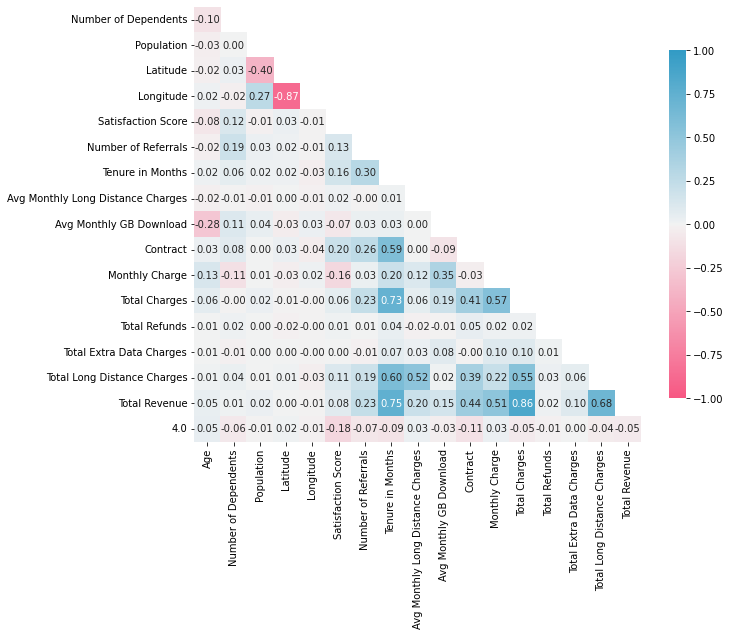

Class 5
Satisfaction Score                  -0.151261
Contract                            -0.101805
Tenure in Months                    -0.097826
Number of Referrals                 -0.070090
Total Revenue                       -0.064021
Total Long Distance Charges         -0.063366
Total Charges                       -0.056504
Number of Dependents                -0.042999
Avg Monthly Long Distance Charges   -0.033664
Total Refunds                       -0.018505
Latitude                            -0.004396
Total Extra Data Charges            -0.001117
Population                           0.000144
Longitude                            0.000838
Avg Monthly GB Download              0.018049
Age                                  0.023400
Monthly Charge                       0.053929
5.0                                  1.000000
Name: 5.0, dtype: float64
Population                           0.000144
Longitude                            0.000838
Total Extra Data Charges             0.001117


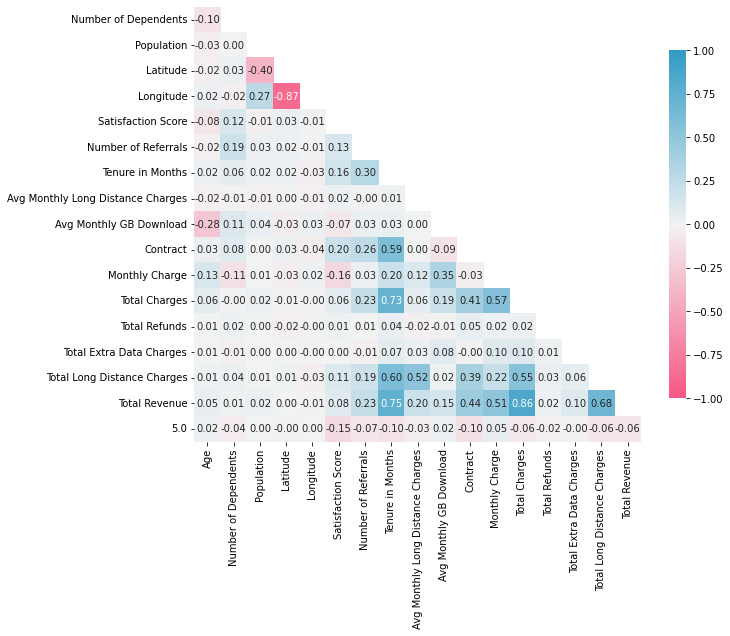

In [ ]:
for i,df_corr in enumerate(df_corrs):
    print('Class '+str(i))
    print(df_corr[i].sort_values())
    print(df_corr[i].abs().sort_values())


    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # plot heatmap
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
               vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # sb.heatmap(corr, annot=True, fmt=".2f", cmap=cmap,
            # vmin=-1, vmax=1, cbar_kws={"shrink": .8}).set_title(f'Class {i}')
    # yticks
    plt.yticks(rotation=0)
    plt.show()